# 📊 Plataforma de Análise de Indicadores de Resiliência Socioecológica

### Gabriel de Antonio Mazetto  
**Projeto de Iniciação Científica - PIBIC/CNPq/INPE**  
- Orientadora: Dra. Minella Alves Martins (INPE)
- Co-orientadora: Dra. Maria Paula Pires de Oliveira (PUC-Campinas)
- Colaboradora: Denise Helena Lombardo Ferreira (PUC-Campinas)
- Período: Agosto/2024 — Agosto/2025  

**Apoio Institucional:**   
- Ferramenta elaborado com apoio do Conselho Nacional de Desenvolvimento Científico e Tecnológico (bolsa PIBIC/CNPq/INPE) e da Coordenação de Aperfeiçoamento de Pessoal de Nível Superior - Brasil (CAPES) – Código de Financiamento 001.

🔗 **Site do Projeto (versão web):**  
https://resiliencia-socioecologica-ic.github.io/plataforma-indicadores-resiliencia/

📚 **Sistema de Indicadores:**  
Este notebook implementa o sistema de indicadores desenvolvido por **Maria Paula Pires de Oliveira** em sua pesquisa de doutorado:  
**"Aprendizagem para resiliência socioecológica de comunidades rurais: sistema de indicadores a partir de uma escola do campo" (Oliveira, 2023)**  
🔗 [Acesse a tese na íntegra](https://repositorio.ufscar.br/handle/ufscar/17284)


---

## 🎯 Objetivo Geral

Este notebook foi desenvolvido com o objetivo de automatizar a análise e a visualização de dados coletados por meio do sistema de indicadores para avaliar a contribuição de escolas do campo na resiliência socioecológica de comunidades rurais.

---

## 🛠️ Funcionalidades

- Importação de arquivos `.csv` ou `.xlsx` com as respostas de diferentes grupos escolares;
- Uso de uma “Tabela de Consulta” para mapear perguntas a indicadores e dimensões;
- Geração automática de gráficos (barras, teia/radar, perfis e quadros de resposta);
- Personalização visual dos gráficos via widgets interativos;
- Exportação de imagens em `.png` e geração de relatório completo em `.pdf`;
- Filtragem inteligente de respostas discursivas genéricas para quadros de respostas.

---

Este notebook é uma etapa anterior à plataforma web, e serve como alternativa técnica acessível baseada em Python, sem necessidade de instalação de softwares locais. Ele foi utilizado como base para o desenvolvimento da [plataforma interativa no navegador](https://resiliencia-socioecologica-ic.github.io/plataforma-indicadores-resiliencia/).


# **Executar Sempre.**

## Importando Bibliotecas e Inicializando os dataframes

In [ ]:
!pip install fpdf

  Preparing metadata (setup.py) ... done
  Created wheel for fpdf: filename=fpdf-1.7.2-py2.py3-none-any.whl size=40704 sha256=3c42f5c0bf62fb5ce15f1fb8d6b3de22f763bad311e5bb5c4c08c5e56d1b9b17
  Stored in directory: /root/.cache/pip/wheels/65/4f/66/bbda9866da446a72e206d6484cd97381cbc7859a7068541c36
Successfully built fpdf


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import numpy as np
import textwrap
import matplotlib.colors as mcolors
from matplotlib.table import Table
import re
import os
from IPython.display import clear_output
from fpdf import FPDF
import os
from PIL import Image
import pickle
from google.colab import files
import random
import unicodedata
import difflib

In [ ]:
df_consulta = None
df_estudantes = None
df_ex_estudantes = None
df_familiares = None
df_equipe_escolar = None

In [ ]:
def upload_file_and_load_as_dataframe():
    """
    Realiza o upload de um arquivo Excel (.xlsx) ou CSV (.csv) e o carrega como um DataFrame.

    Retorna:
        pd.DataFrame: DataFrame carregado a partir do arquivo enviado.
        None: Se o arquivo não for um Excel ou CSV válido.
    """
    import pandas as pd
    from google.colab import files

    # Realiza o upload do arquivo
    uploaded = files.upload()

    # Itera sobre os arquivos enviados
    for filename in uploaded.keys():
        if filename.endswith('.xlsx'):
            print(f"Lendo {filename} como DataFrame do Excel...")
            return pd.read_excel(filename)  # Lê arquivo Excel
        elif filename.endswith('.csv'):
            print(f"Lendo {filename} como DataFrame do CSV...")
            return pd.read_csv(filename)  # Lê arquivo CSV
        else:
            print(f"Arquivo {filename} não é suportado. Apenas .xlsx e .csv são permitidos.")
            return None  # Retorna None se o arquivo não for suportado

# Opção 1: Carregar arquivos individualmente

In [ ]:
# @title Carregar arquivo da Equipe Escolar
print("Faça o upload para df_equipe_escolar:\n")
df_equipe_escolar = upload_file_and_load_as_dataframe()
if df_equipe_escolar is not None:
    print("\n\nArquivo carregado com sucesso!")

In [ ]:
# @title Carregar arquivo dos Estudantes
print("Faça o upload para df_estudantes:\n")
df_estudantes = upload_file_and_load_as_dataframe()
if df_estudantes is not None:
    print("\n\nArquivo carregado com sucesso!")

In [ ]:
# @title Carregar arquivo dos Ex-estudantes
print("Faça o upload para df_ex_estudantes:\n")
df_ex_estudantes = upload_file_and_load_as_dataframe()
if df_ex_estudantes is not None:
    print("\n\nArquivo carregado com sucesso!")

In [ ]:
# @title Carregar arquivo dos Familiares
print("Faça o upload para df_familiares:\n")
df_familiares = upload_file_and_load_as_dataframe()
if df_familiares is not None:
    print("\n\nArquivo carregado com sucesso!")

In [ ]:
# @title Carregar arquivo da tabela de Consulta
print("Faça o upload para df_consulta:\n")
df_consulta = upload_file_and_load_as_dataframe()
if df_consulta is not None:
    print("\n\nArquivo carregado com sucesso!")

# **Exectuar Sempre.** (Caso carregue individualmente os arquivos)

In [ ]:
def transform_null_values(df):
    """Usado para transformar qualquer valor nulo que seja string em um valor None"""
    if df is not None:
      return df.map(lambda x: None if str(x).strip().lower() in ['nan', 'none', ''] else x)
    else:
      return None

# Aplicando a função ao DataFrame convertido
df_equipe_escolar = transform_null_values(df_equipe_escolar)
df_estudantes = transform_null_values(df_estudantes)
df_ex_estudantes = transform_null_values(df_ex_estudantes)
df_familiares = transform_null_values(df_familiares)
df_consulta = transform_null_values(df_consulta)

In [ ]:
df_equipe_escolar3 = df_equipe_escolar.copy() if df_equipe_escolar is not None else None
df_estudantes3 = df_estudantes.copy() if df_estudantes is not None else None
df_ex_estudantes3 = df_ex_estudantes.copy() if df_ex_estudantes is not None else None
df_familiares3 = df_familiares.copy() if df_familiares is not None else None
df_consulta2 = df_consulta.copy() if df_consulta is not None else None

In [ ]:
# --- FUNÇÕES AUXILIARES ---
def verificar_categoria(categoria):
    """Verifica se a categoria começa com letra maiúscula após uma vírgula."""
    if pd.isna(categoria) or categoria is None:
        return []
    partes = str(categoria).split(', ')
    novas_categorias = [partes[0]]
    for parte in partes[1:]:
        if parte and parte[0].isupper():
            novas_categorias.append(parte)
    return novas_categorias

def identificar_tipo_de_grafico_novo(colunas):
    # 1. Limpeza Interna: Garante que strings como 'None', 'nan' ou '' sejam tratadas como nulas (None/NaN).
    #    Isso torna a função robusta, independentemente do tipo de dado que chega.
    colunas_limpas = []
    for serie in colunas:
        # A função .map() aplica a limpeza a cada célula da série
        serie_limpa = serie.map(lambda x: None if str(x).strip().lower() in ['nan', 'none', ''] else x)
        colunas_limpas.append(serie_limpa)

    for serie in colunas_limpas:
        if not serie.empty:
            if (serie.isna().sum() / len(serie)) > 0.20:
                return 'Quadro de respostas abertas'

    todas_respostas = pd.concat(colunas_limpas, ignore_index=True)
    respostas_validas = todas_respostas.dropna().astype(str).str.strip()

    if respostas_validas.empty:
        return 'Quadro de respostas abertas'

    eh_teia = respostas_validas.str.contains(r',|\(.+\)').any()
    if eh_teia:
        return 'Teia'

    frequency_map = respostas_validas.value_counts()

    found_unique_long_answer = False
    for resp, count in frequency_map.items():
        word_count = len(resp.split())
        if count == 1 and word_count > 6:
            found_unique_long_answer = True
            break

    if found_unique_long_answer:
        return 'Quadro de respostas abertas'

    unique_valid_count = len(frequency_map)
    return 'Barra' if unique_valid_count <= 6 else 'Quadro de respostas abertas'

# Lista de DataFrames de respostas
dataframes_respostas = {
    'estudantes': df_estudantes3,
    'ex_estudantes': df_ex_estudantes3,
    'familiares': df_familiares3,
    'equipe_escolar': df_equipe_escolar3
}

# Lista para armazenar os tipos de gráfico calculados
tipos_de_grafico_calculados = []

# Garante que a coluna chave em df_consulta seja do tipo string para a busca
df_consulta['No do gráfico'] = df_consulta['No do gráfico'].astype(str)

# Itera sobre cada identificador na sua tabela de consulta original
for identificador in df_consulta['No do gráfico']:
    colunas_para_analisar = []

    for df_resp in dataframes_respostas.values():
        if df_resp is not None:
            colunas_encontradas = [col for col in df_resp.columns if f'[{identificador}]' in col]
            for coluna in colunas_encontradas:
                colunas_para_analisar.append(df_resp[coluna])

    if colunas_para_analisar:
        tipo = identificar_tipo_de_grafico_novo(colunas_para_analisar)
        tipos_de_grafico_calculados.append(tipo)
    else:
        tipos_de_grafico_calculados.append('Barra')

# Adiciona a nova coluna com os tipos de gráfico ao DataFrame original
df_consulta['Tipo de gráfico'] = tipos_de_grafico_calculados

# Cria df_consulta2 como uma cópia da tabela
df_consulta2 = df_consulta.copy()

# Reorganiza as colunas
colunas_principais = ['Dimensão', 'Indicador', 'No do gráfico', 'Tipo de gráfico', 'Título do gráfico']
outras_colunas_perguntas = [col for col in df_consulta2.columns if col not in colunas_principais]
df_consulta2 = df_consulta2[colunas_principais + outras_colunas_perguntas]

# Filtra linhas relevantes com base nos prefixos do 'No do gráfico'
df_consulta2 = df_consulta2[df_consulta2['No do gráfico'].str.startswith(('1', '2', '3', '4', '5'))]
df_consulta2 = df_consulta2.reset_index(drop=True)

# Exibe o DataFrame final
display(df_consulta2)

,Dimensão,Indicador,No do gráfico,Tipo de gráfico,Título do gráfico,Pergunta estudantes,Perg. ex-estudantes,Perg. familiares,Perg. equipe escolar
0,Dimensão 1 - DIVERSIDADE DA PAISAGEM E PROTEÇÃ...,Indicador 1.1: Impacto das práticas escolares ...,1.1.1,Barra,Identificação do estado de conservação e diver...,"Você sabe identificar as características, o es...","Você sabe identificar as características, o es...","Você sabe identificar as características, a di...",Você considera importante o aprendizado quanto...
1,Dimensão 1 - DIVERSIDADE DA PAISAGEM E PROTEÇÃ...,Indicador 1.1: Impacto das práticas escolares ...,1.1.2,Barra,Influência da escola para percepção da paisagem,A escola contribui para que você tenha maior e...,A escola contribuiu para que você tivesse maio...,Você acha que a escola ajudou a/o estudante a ...,Você considera que a escola trabalha com o ent...
2,Dimensão 1 - DIVERSIDADE DA PAISAGEM E PROTEÇÃ...,Indicador 1.1: Impacto das práticas escolares ...,1.1.3,Barra,Compartilhamento de aprendizados sobre a perce...,Você compartilha esses aprendizados (leitura d...,Você compartilha esses aprendizados (leitura d...,A/o estudante divide com a família e/ou outras...,Você considera que a escola incentiva que as/o...
3,Dimensão 1 - DIVERSIDADE DA PAISAGEM E PROTEÇÃ...,Indicador 1.2: Desempenho das práticas escolar...,1.2.1,Barra,Identificação da proteção do ecossistema,"Ao observar uma paisagem, você considera ser c...","Ao observar uma paisagem, você considera ser c...","Ao observar uma paisagem, você considera ser c...",None
4,Dimensão 1 - DIVERSIDADE DA PAISAGEM E PROTEÇÃ...,Indicador 1.2: Desempenho das práticas escolar...,1.2.2,Barra,Importância dada aos ecossistemas e sua proteção,Você considera que os ecossistemas possuem imp...,Você considera que os ecossistemas possuem imp...,Você acha importante proteger os elementos ori...,Você considera necessário e relevante o aprend...
...,...,...,...,...,...,...,...,...,...
90,"DIMENSÃO 4: AUTO-ORGANIZAÇÃO, GOVERNANÇA, EQUI...",Indicador 4.4: Impacto das práticas escolares ...,4.4.9,Barra,"Equidade no acesso a recursos, educação e info...",Na comunidade o acesso aos recursos e oportuni...,Na comunidade o acesso aos recursos e oportuni...,Na comunidade o acesso aos recursos e oportuni...,None
91,"DIMENSÃO 4: AUTO-ORGANIZAÇÃO, GOVERNANÇA, EQUI...",Indicador 4.4: Impacto das práticas escolares ...,4.4.10,Barra,Incentivo da escola para promoção da igualdade...,A escola incentiva você a promover a igualdade...,A escola incentivou você a promover a igualdad...,"Na sua visão, a/o estudante busca ajudar na ig...",Na sua atuação escolar você incentiva as/os es...
92,"DIMENSÃO 4: AUTO-ORGANIZAÇÃO, GOVERNANÇA, EQUI...",Cosiderações gerais,4.5,Quadro de respostas abertas,Comentários adicionais quanto à contribuição d...,Espaço livre caso queira complementar algo qua...,Espaço livre caso queira complementar algo qua...,Espaço livre caso queira complementar algo qua...,Espaço livre caso queira complementar algo qua...
93,PRÁTICAS ESCOLARES,PRÁTICAS ESCOLARES,5.1,Teia,(a) Práticas que mais ajudam,(a) Quais das seguintes práticas vivenciadas n...,(a) Quais das seguintes práticas vivenciadas n...,None,(a) Quais das seguintes práticas vivenciadas n...


# Opção 2: Carregar arquivo completo

In [ ]:
# @title Carregando o arquivo

# Fazer upload do arquivo HDF5
uploaded = files.upload()

# Obter o nome do arquivo (primeira chave do dicionário "uploaded")
file_path_arquivo_completo = list(uploaded.keys())[0]

# Carregar os DataFrames do arquivo HDF5
loaded_dataframes = {}

with pd.HDFStore(file_path_arquivo_completo, mode='r') as store:
    for key in store.keys():
        # Remover o '/' do nome da chave ao carregar
        loaded_dataframes[key.strip('/')] = store[key]

df_consulta2 = loaded_dataframes.get('df_consulta2')
df_estudantes3 = loaded_dataframes.get('df_estudantes3')
df_ex_estudantes3 = loaded_dataframes.get('df_ex_estudantes3')
df_familiares3 = loaded_dataframes.get('df_familiares3')
df_equipe_escolar3 = loaded_dataframes.get('df_equipe_escolar3')

def transform_null_values(df):
    """Usado para transformar qualquer valor nulo que seja string em um valor None"""
    if df is not None:
      return df.map(lambda x: None if str(x).strip().lower() in ['nan', 'none', ''] else x)
    else:
      return None

# Aplicando a função ao DataFrame convertido
df_consulta2 = transform_null_values(df_consulta2)

print('\nDataframes carregados com sucesso')

# **Executar Sempre.**

## Funções Para Gerar os Gráficos

### **Tabela**

In [ ]:
def buscar_nomes_colunas(codigo_consulta, df_estudantes, df_ex_estudantes, df_familiares, df_equipe_escolar):
    """Retorna um dicionário com os valores sendo uma lista de perguntas encontradas a partir do código passado"""

    # Função auxiliar para buscar a coluna em um DataFrame
    def get_column_name(dataframe):
        if dataframe is not None:
            # Regex para buscar identificadores no formato [n.n.nm] no final
            padrao = rf'\[{re.escape(codigo_consulta)}\]$'
            colunas_com_identificador = [col for col in dataframe.columns if re.search(padrao, col)]
            colunas_com_identificador.sort()
            if colunas_com_identificador:
                return colunas_com_identificador
        return None

    # Construir o dicionário de resultados para cada DataFrame
    resultados = {
        'Estudantes': get_column_name(df_estudantes),
        'Ex-Estudantes': get_column_name(df_ex_estudantes),
        'Familiares': get_column_name(df_familiares),
        'Equipe Escolar': get_column_name(df_equipe_escolar)
    }

    return resultados

# Exemplo de uso
consulta = '4.5.1'
buscar_nomes_colunas(consulta, df_estudantes3, df_ex_estudantes3, df_familiares3, df_equipe_escolar3)

{'Estudantes': None,
 'Ex-Estudantes': None,
 'Familiares': None,
 'Equipe Escolar': None}

In [ ]:
def manual_spacing(text, width):
    """Adiciona a cada linha espaços necessários para que o texto fique justificado à direita, passando o texto e a quantidade de caracteres por linha desejado."""

    lines = textwrap.wrap(text, width)
    spaced_lines = []
    for i, line in enumerate(lines):
        is_last_line = i == len(lines) - 1
        if len(lines) == 1 or is_last_line or len(line.split()) == 1:
            # Se houver apenas uma linha, uma palavra na linha ou se for a última linha, retorne o texto original formatado
            spaced_lines.append(line)
        else:
          words = line.split()
          line_length = len(line)
          extra_spaces = width - line_length
          if extra_spaces > 0:
              while extra_spaces > 0:
                  #print(words, extra_spaces)
                  for i in range(len(words) - 1):
                      words[i] += " "
                      extra_spaces -= 1
                      if extra_spaces == 0:
                          break
          spaced_lines.append(" ".join(words))
    return "\n".join(spaced_lines)

In [ ]:
text = "Estou muito feliz com minha nota! ooo oooooo oo ooooo ooo oooo ooo ooo oo oo oo oooooo oo oooo ooo ooo oooo oooo ooo oooooo oooooooo ooooooooooo oooooo oooo ooooooo ooooo ooooo ooooooooo oooooo oooooo ooooo ooooo oo ooooooo oooo oooooo ooo ooooo ooo ooooooo ooooo ooooo oooooo ooooo ooooo oooooo ooooo ooooooo ooooo oooo ooooooo oooo ooooo ooooo ooo ooooooo oooo ooooooo oooooo oooooo ooooo ooooo ooo ooooo ooo ooooooo oooooo oooo ooo o ooo oooooo oo ooo Estou muito feliz com minha nota! ooo oooooo oo ooooo ooo oooo ooo ooo oo oo oo oooooo oo oooo ooo ooo oooo oooo ooo oooooo oooooooo ooooooooooo oooooo oooo ooooooo ooooo ooooo ooooooooo oooooo oooooo ooooo ooooo oo ooooooo oooo oooooo ooo ooooo ooo ooooooo ooooo ooooo oooooo ooooo ooooo oooooo ooooo ooooooo ooooo oooo ooooooo oooo ooooo ooooo ooo ooooooo oooo ooooooo oooooo oooooo ooooo ooooo ooo ooooo ooo ooooooo oooooo oooo ooo o ooo oooooo oo ooooo"
print(manual_spacing(text, 60))

Estou  muito  feliz  com minha nota! ooo oooooo oo ooooo ooo
oooo  ooo  ooo oo oo oo oooooo oo oooo ooo ooo oooo oooo ooo
oooooo  oooooooo ooooooooooo oooooo oooo ooooooo ooooo ooooo
ooooooooo  oooooo  oooooo ooooo ooooo oo ooooooo oooo oooooo
ooo  ooooo ooo ooooooo ooooo ooooo oooooo ooooo ooooo oooooo
ooooo  ooooooo  ooooo  oooo  ooooooo  oooo  ooooo  ooooo ooo
ooooooo oooo ooooooo oooooo oooooo ooooo ooooo ooo ooooo ooo
ooooooo  oooooo  oooo  ooo  o  ooo oooooo oo ooo Estou muito
feliz  com  minha nota! ooo oooooo oo ooooo ooo oooo ooo ooo
oo  oo  oo  oooooo  oo  oooo  ooo  ooo  oooo oooo ooo oooooo
oooooooo   ooooooooooo   oooooo  oooo  ooooooo  ooooo  ooooo
ooooooooo  oooooo  oooooo ooooo ooooo oo ooooooo oooo oooooo
ooo  ooooo ooo ooooooo ooooo ooooo oooooo ooooo ooooo oooooo
ooooo  ooooooo  ooooo  oooo  ooooooo  oooo  ooooo  ooooo ooo
ooooooo oooo ooooooo oooooo oooooo ooooo ooooo ooo ooooo ooo
ooooooo oooooo oooo ooo o ooo oooooo oo ooooo


In [ ]:
text = "Estou muito feliz com minha nota!"
print(manual_spacing(text, 60))

Estou muito feliz com minha nota!


In [ ]:
# Função para plotar tabela em um gráfico existente
def plot_tabela_perg(ax, dataframe, fig_grafico=(10,10), fig_padrao=(10,10), table_width=1, col_widths=[1, 5], title_height=0.1, space=0.15, edge_width=2, default_len_text=60, fontsize=[12, 10], height_factor=1, head_color='#b0c4de', cell_color='#f0f8ff', edge_color='white'):

    """
    Plota uma tabela em um gráfico existente, ajustando tamanhos, cores e espaçamentos de acordo com os parâmetros.

    Args:
        ax (matplotlib.axes.Axes): Eixo onde a tabela será desenhada.
        dataframe (pd.DataFrame): DataFrame com as perguntas de cada grupo.
        fig_grafico (tuple, opcional): Dimensões da figura do gráfico (largura, altura). Padrão é (10, 10).
        fig_padrao (tuple, opcional): Dimensões padrão da figura para ajuste relativo. Padrão é (10, 10).
        table_width (float, opcional): Largura da tabela relativa ao eixo. Padrão é 1.
        col_widths (list, opcional): Largura relativa das colunas. Use -1 para largura uniforme. Padrão é [1, 5].
        title_height (float, opcional): Altura do título (cabeçalho) da tabela. Padrão é 0.1.
        space (float, opcional): Espaçamento entre a tabela e o gráfico. Padrão é 0.15.
        edge_width (float, opcional): Largura das bordas das células. Padrão é 2.
        default_len_text (int, opcional): Comprimento padrão do texto para ajuste de largura. Padrão é 60.
        fontsize (list, opcional): Tamanhos das fontes [cabeçalho, células]. Padrão é [12, 10].
        height_factor (float, opcional): Fator de ajuste da altura das células. Padrão é 1.
        head_color (str, opcional): Cor de fundo do cabeçalho da tabela. Padrão é '#b0c4de'.
        cell_color (str, opcional): Cor de fundo das células da tabela. Padrão é '#f0f8ff'.
        edge_color (str, opcional): Cor das bordas das células. Padrão é 'white'.
    """

    if dataframe is not None:
      nrows, ncols = dataframe.shape
      col_widths = [1] * ncols if col_widths == -1 else col_widths

      height_factor = (1+1.5*np.exp(-0.2*(nrows))) * height_factor

      default_height = 0.05
      n_lin_height_factor = 0.023
      default_font_size = 10
      default_font_size_factor = 0.12
      font_size_height_factor = 1 + default_font_size_factor * (fontsize[1] - default_font_size)

      default_col_width = 4
      #default_len_text = 85
      default_width_factor = 4/1
      width_factor = (col_widths[1]/col_widths[0]) / default_col_width
      width_factor = 1 + (width_factor - 1) * 0.2 # reduzindo a influência do fator para 0.2

      fig_factor = fig_grafico[1]/fig_padrao[1] # fator de mudança de largura do figsize do gráfico em cima da tabela

      len_text1 = int(default_len_text * width_factor)
      len_text2 = int((default_len_text * width_factor) * (1/font_size_height_factor) * table_width * fig_factor)
      #print(len_text2)
      total_table_height = title_height
      row_heights = []
      for row in range(nrows):
        raw_text = str(dataframe.iat[row, 1])
        text = manual_spacing(raw_text, width=len_text2)
        num_lines = len(text.splitlines())
        row_height = ((num_lines-1) * n_lin_height_factor * font_size_height_factor + default_height) * height_factor  # Altura baseada no número de linhas
        row_heights.append(row_height)
        total_table_height += row_height

      y_init = -total_table_height - space
      tabela = Table(ax, bbox=[0, y_init, table_width, total_table_height])  # Ajuste da posição da tabela
      tabela.auto_set_font_size(False)

      for col in range(ncols):
          raw_text = str(dataframe.columns[col])
          #text = textwrap.fill(raw_text, width=len_text)
          text = manual_spacing(raw_text, width=len_text2)
          cell = tabela.add_cell(0, col, width=col_widths[col], height=title_height, text=text,
                                loc='center', facecolor=head_color, edgecolor=edge_color)
          cell.get_text().set_color('black')
          cell.get_text().set_fontweight('bold')
          cell.get_text().set_fontsize(fontsize[0])
          cell.set_linewidth(edge_width)
          cell.get_text().set_family('monospace')

      # Preenche as células com dados
      for row in range(nrows):
          for col in range(ncols):
              raw_text = str(dataframe.iat[row, col])
              text = manual_spacing(raw_text, width=len_text2)

              cell = tabela.add_cell(row + 1, col, width=col_widths[col], height=row_heights[row], text=text,
                                    loc='left', facecolor=cell_color, edgecolor=edge_color)
              cell.get_text().set_fontsize(fontsize[1])
              cell.get_text().set_color('#28282B')
              cell.get_text().set_fontweight('normal')
              cell.set_linewidth(edge_width)
              cell.get_text().set_family('monospace')

      # Define a tabela no eixo
      ax.add_table(tabela)

In [ ]:
def encontrar_indice_zigue_zague(df, n):
    """Retorna o índice da linha e coluna do número setado em 'n'. Será usado para excluir uma linha específica da tabela"""
    if df is not None:
        total_elementos = df.count().sum()  # Número total de elementos não nulos
        if n > total_elementos:
            raise None

        # Variável para contar o número de elementos percorridos
        contador = 0

        # Percorre as colunas
        for col in df.columns:
            for row in range(len(df)):
                if pd.notna(df.at[row, col]):  # Considera apenas valores não nulos
                    contador += 1
                    if contador == n:
                        return row, col  # Retorna o índice da linha e o nome da coluna

    return None # Caso o valor não seja encontrado ou se df for None

In [ ]:
# Função para plotar tabela em um gráfico novo
def plot_tabela(df, title="", new_title="", update_title=False, pad_title=20, color_title="black", default_len_text=85, fig_col_width=10, height_factor=1, edge_width=2, fontsize=[16, 12, 10], head_color='#b0c4de', cell_color='#f0f8ff', edge_color='white', lines_to_remove=None):
    """
    Plota um DataFrame como uma tabela estilizada em um gráfico.

    Esta função gera uma visualização gráfica de uma tabela com opções para personalizar estilos,
    ajustar alturas dinâmicas de linhas e remover valores especificados. O título da tabela
    pode ser atualizado ou formatado automaticamente com base nos parâmetros fornecidos.

    Parâmetros:
        df (pd.DataFrame): DataFrame contendo os dados a serem exibidos na tabela.
        title (str): Título principal da tabela.
        new_title (str): Novo título a ser aplicado se `update_title` for True.
        update_title (bool): Se True, substitui o título atual pelo `new_title`. Default: False.
        pad_title (int): Espaçamento entre o título e a tabela. Default: 20.
        color_title (str): Cor do título. Default: "black".
        default_len_text (int): Comprimento padrão dos textos antes de quebra automática de linha. Default: 85.
        fig_col_width (float): Largura da figura gerada em polegadas. Default: 10.
        height_factor (float): Fator multiplicador para ajustar a altura das linhas da tabela. Default: 1.
        edge_width (int): Espessura das bordas das células da tabela. Default: 2.
        fontsize (list): Lista de tamanhos de fonte [título, cabeçalho, células]. Default: [16, 12, 10].
        head_color (str): Cor de fundo para os cabeçalhos das colunas. Default: '#b0c4de'.
        cell_color (str): Cor de fundo para as células de dados. Default: '#f0f8ff'.
        edge_color (str): Cor das bordas das células. Default: 'white'.
        lines_to_remove (int or tuple): Número(s) do elemento para remover da tabela. Default: None.

    Retorna:
        matplotlib.figure.Figure: Figura contendo a tabela estilizada.

    Notas:
        - A altura da tabela é ajustada dinamicamente com base na quantidade de elementos no DataFrame e nos fatores de altura.
        - O título pode ser ajustado automaticamente para caber no comprimento da figura com quebras de linha.
        - A função utiliza a biblioteca Matplotlib para criar gráficos e exibir a tabela.
    """

    # Verifica se o DataFrame recebido (que já pode ter sido limpo) não tem dados para exibir.
    # Se a contagem total de elementos for zero, não há o que plotar.
    if df.count().sum() == 0:
        print(f"Aviso: Não há dados válidos para exibir na tabela '{title}'. Gráfico ignorado.")
        return None # Retorna None para que o loop de salvamento possa ignorá-lo

    total_count = df.count().sum()
    height_factor = (1+3*np.exp(-0.2*(total_count))) * height_factor

    #Remover linhas especificadas
    to_remove = []
    if lines_to_remove is not None:
        lines_to_remove = lines_to_remove if isinstance(lines_to_remove, tuple) else (lines_to_remove,)
        for line in lines_to_remove:
            indices = encontrar_indice_zigue_zague(df, line)
            if indices is not None:
                row, col = indices
                to_remove.append((row, col))
    for row, col in to_remove:
        df.loc[row, col] = None

    col_width = 1

    default_font_size = 10
    default_font_size_factor = 0.1
    font_size_height_factor1 = 1 + default_font_size_factor * (fontsize[1] - default_font_size)
    font_size_height_factor2 = 1 + default_font_size_factor * (fontsize[2] - default_font_size)

    n_lin_height_factor = 0.05
    default_height = 0.15

    default_fig_size = 10
    width_factor = fig_col_width / default_fig_size
    len_text1 = int(default_len_text * width_factor)
    len_text2 = int((default_len_text * width_factor) * (1/font_size_height_factor2))

    height_lins = []
    total_table_height = 0
    # Itera pelas colunas do DataFrame para calcular a altura de cada linha
    for group, responses in df.items():
        # Adiciona a altura do título do grupo
        num_lines = len(group.splitlines())
        row_height = ((num_lines-1) * n_lin_height_factor * font_size_height_factor1 + default_height) * height_factor
        total_table_height += row_height
        height_lins.append(row_height)
        # Adiciona as respostas do grupo com alturas dinâmicas
        for response in responses.dropna():
            text = manual_spacing(str(response), width=len_text2)
            num_lines = len(text.splitlines())
            row_height = ((num_lines-1) * n_lin_height_factor * font_size_height_factor2 + default_height) * height_factor
            height_lins.append(row_height)
            total_table_height += row_height

    # Cria uma nova figura e eixo
    fig, ax = plt.subplots(figsize=(fig_col_width, total_table_height))
    if update_title:
        title = new_title
    font_size_height_factor0 = 1 + default_font_size_factor * (fontsize[0] - default_font_size)
    len_text0 = int((default_len_text * width_factor) * (1/font_size_height_factor0))
    title = textwrap.fill(str(title), width=len_text0)

    ax.set_title(title, fontsize=fontsize[0], color=color_title)
    ax.axis('off')

    default_pad = total_table_height - 1
    pad_title += default_pad
    tabela = Table(ax, bbox=[0, -pad_title, col_width, total_table_height])
    tabela.auto_set_font_size(False)

    row_position = 0

    for group, responses in df.items():
        height = height_lins[row_position]
        cell = tabela.add_cell(row_position, 0, width=col_width, height=height, text=group,
                               loc='left', facecolor=head_color, edgecolor=edge_color)
        cell.get_text().set_color('black')
        cell.get_text().set_fontweight('bold')
        cell.get_text().set_fontsize(fontsize[1])
        cell.set_linewidth(edge_width)
        cell.get_text().set_family('monospace')
        row_position += 1

        for response in responses.dropna():
            text = manual_spacing(str(response), width=len_text2)
            height = height_lins[row_position]
            cell = tabela.add_cell(row_position, 0, width=col_width, height=height, text=text,
                                   loc='left', facecolor=cell_color, edgecolor=edge_color)
            cell.get_text().set_fontsize(fontsize[2])
            cell.get_text().set_color('#28282B')
            cell.get_text().set_fontweight('normal')
            cell.set_linewidth(edge_width)
            cell.get_text().set_family('monospace')
            row_position += 1

    ax.add_table(tabela)
    return fig

/tmp/ipython-input-20-4026835318.py:61: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  dataframe = dataframe.applymap(replace_inutile)


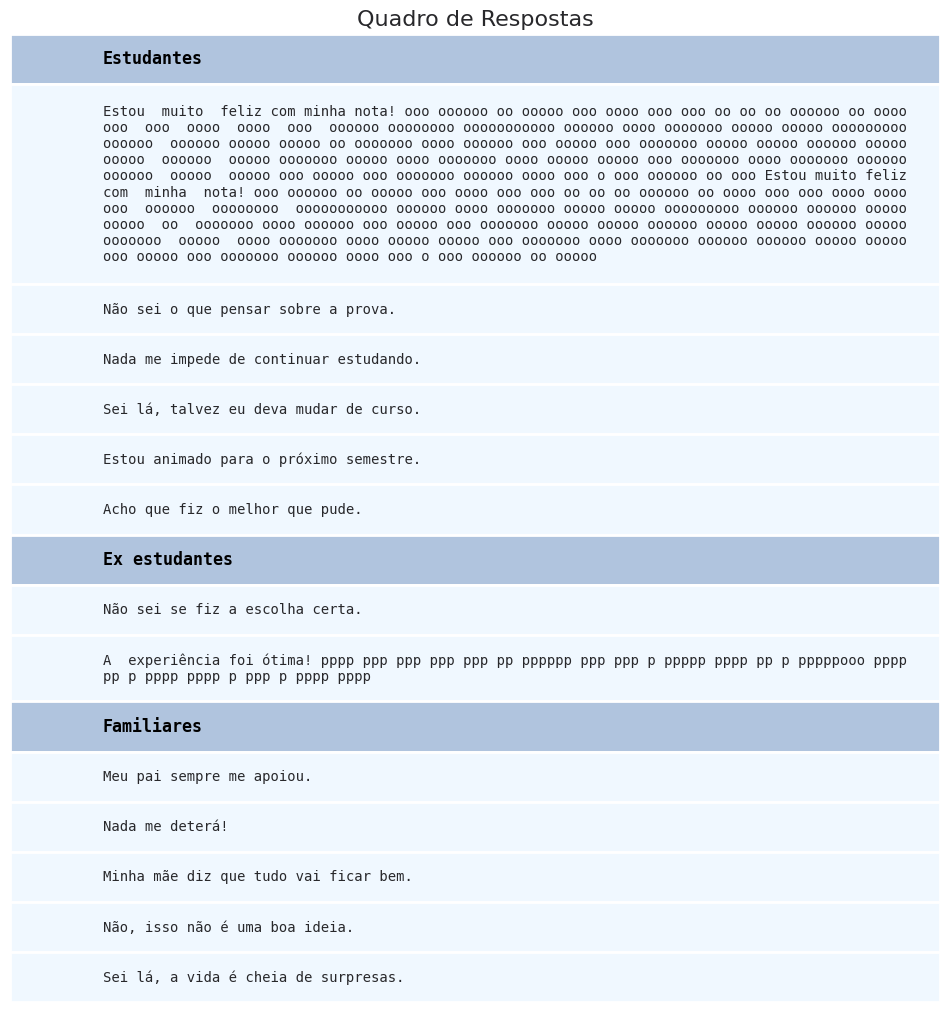

In [ ]:
import unicodedata
import difflib

data = {
    "Estudantes": [
        "Estou muito feliz com minha nota! ooo oooooo oo ooooo ooo oooo ooo ooo oo oo oo oooooo oo oooo ooo ooo oooo oooo ooo oooooo oooooooo ooooooooooo oooooo oooo ooooooo ooooo ooooo ooooooooo oooooo oooooo ooooo ooooo oo ooooooo oooo oooooo ooo ooooo ooo ooooooo ooooo ooooo oooooo ooooo ooooo oooooo ooooo ooooooo ooooo oooo ooooooo oooo ooooo ooooo ooo ooooooo oooo ooooooo oooooo oooooo ooooo ooooo ooo ooooo ooo ooooooo oooooo oooo ooo o ooo oooooo oo ooo Estou muito feliz com minha nota! ooo oooooo oo ooooo ooo oooo ooo ooo oo oo oo oooooo oo oooo ooo ooo oooo oooo ooo oooooo oooooooo ooooooooooo oooooo oooo ooooooo ooooo ooooo ooooooooo oooooo oooooo ooooo ooooo oo ooooooo oooo oooooo ooo ooooo ooo ooooooo ooooo ooooo oooooo ooooo ooooo oooooo ooooo ooooooo ooooo oooo ooooooo oooo ooooo ooooo ooo ooooooo oooo ooooooo oooooo oooooo ooooo ooooo ooo ooooo ooo ooooooo oooooo oooo ooo o ooo oooooo oo ooooo",
        "Não sei o que pensar sobre a prova.",
        "Nada me impede de continuar estudando.",
        "Sei lá, talvez eu deva mudar de curso.",
        "Estou animado para o próximo semestre.",
        "N",
        "Não",
        "Acho que fiz o melhor que pude."
    ],
    "Ex estudantes": [
        "Não sei se fiz a escolha certa.",
        "A experiência foi ótima! pppp ppp ppp ppp ppp pp pppppp ppp ppp p ppppp pppp pp p pppppooo pppp pp p pppp pppp p ppp p pppp pppp",
        "Náda",
        "Nao Sei"
    ],
    "Familiares": [
        "Meu pai sempre me apoiou.",
        "Nada me deterá!",
        "Minha mãe diz que tudo vai ficar bem.",
        "Não, isso não é uma boa ideia.",
        "Sei lá, a vida é cheia de surpresas.",
        "Não sie",
        "k",
        "sei ls"
    ]
}

dataframe = pd.DataFrame(dict([(k, pd.Series(v)) for k, v in data.items()]))

palavras_inuteis = ["não", "nada", "n", "não sei", "sei lá", "não tenho nada a dizer", "acho que não",
                    "dificilmente", "ok", "sim", "tá bom", "tá certo", "naum", "nops", "só isso"]

def remover_acentos(texto):
    return ''.join(c for c in unicodedata.normalize('NFD', texto) if unicodedata.category(c) != 'Mn')

def similaridade_palavra(palavra, lista_palavras):
    for item in lista_palavras:
        if difflib.SequenceMatcher(None, palavra, item).ratio() >= 0.8:
            return True
    return False

def replace_inutile(cell):
    cell_str = str(cell)
    cell_str_unaccented = remover_acentos(cell_str.lower())

    if len(cell_str) < 3:
        return None

    for palavra in palavras_inuteis:
        palavra_unaccented = remover_acentos(palavra.lower())
        if palavra_unaccented in cell_str_unaccented or similaridade_palavra(cell_str_unaccented, [palavra_unaccented]):
            if len(cell_str) <= len(palavra) * 2:
                return None
    return cell

dataframe = dataframe.applymap(replace_inutile)

fig = plot_tabela(dataframe, title='Quadro de Respostas', pad_title=0, color_title='#28282B',
                  fig_col_width=12, height_factor=1, default_len_text=80, edge_width=2, fontsize=[16, 12, 10], lines_to_remove=())
plt.show()

### **Histograma**

In [ ]:
def clarear_cor(cor_hex, fator_clareamento):
    # Função para clarear uma cor em formato hex
    cor_hex = cor_hex.lstrip('#')
    r, g, b = tuple(int(cor_hex[i:i + 2], 16) for i in (0, 2, 4))
    r = min(255, int(r + (255 - r) * fator_clareamento))
    g = min(255, int(g + (255 - g) * fator_clareamento))
    b = min(255, int(b + (255 - b) * fator_clareamento))
    return f'#{r:02x}{g:02x}{b:02x}'

In [ ]:
import textwrap

def histograma_empilhado_minimalista(df_dados, df_perg, figsize=(8, 6), title='Distribuição em Porcentagem por Grupo', new_title="", update_title=False, pad_title=20, fontsize=[16, 10, 10, 10], bar_width=0.65, show_table=True, params_tabela_perg=None, bar_colors=None, percent_text_color='black', color_title='#28282B'):
    """
    Cria um histograma empilhado minimalista com barras representando porcentagens, com suporte para personalizações visuais.

    Parâmetros:
    -----------
    df_dados : pandas.DataFrame
        DataFrame contendo os dados a serem plotados. As linhas representam grupos e as colunas, categorias.
    df_perg : pandas.DataFrame
        DataFrame contendo os dados adicionais da tabela, usada em conjunto com `plot_tabela_perg`.
    figsize : tuple, opcional
        Tamanho da figura (largura, altura). O padrão é (8, 6).
    title : str, opcional
        Título do gráfico. O padrão é 'Distribuição em Porcentagem por Grupo'.
    new_title : str, opcional
        Novo título para o gráfico, caso `update_title` seja True. Padrão é uma string vazia.
    update_title : bool, opcional
        Indica se o título deve ser atualizado para `new_title`. Padrão é False.
    pad_title : int, opcional
        Espaçamento entre o título e o gráfico. Padrão é 20.
    fontsize : list, opcional
        Tamanhos de fonte para [título, rótulos do eixo X, título da legenda, texto da legenda]. Padrão é [16, 10, 10, 10].
    bar_width : float, opcional
        Largura das barras no gráfico. Padrão é 0.65.
    show_table : bool, opcional
        Indica se a tabela adicional deve ser exibida. Padrão é True.
    params_tabela_perg : dict, opcional
        Parâmetros adicionais para a função `plot_tabela_perg`, se aplicável. Padrão é None.
    bar_colors : list, opcional
        Lista de cores para as categorias. Se None, usa uma paleta padrão em tons de azul. Padrão é None.
    percent_text_color : str, opcional
        Cor do texto das porcentagens exibidas nas barras. Padrão é 'black'.
    color_title : str, opcional
        Cor do texto do título. Padrão é '#28282B'.

    Notas:
    ------
    - O gráfico é ajustado para incluir até 4 categorias padrão ('Bastante', 'Médio', 'Pouco', 'Nada').
      Cores adicionais são geradas dinamicamente para outras categorias.
    - Porcentagens são exibidas apenas para as duas categorias mais significativas em cada barra.
    - A tabela opcional pode ser usada para adicionar mais contexto ao gráfico.
    """

    # Normalizar os dados para porcentagem
    df_percentual = df_dados.div(df_dados.sum(axis=1), axis=0) * 100
    df_percentual = df_percentual.dropna(axis=0, how='all')

    # Definir a paleta de cores em tons de azul para as classificações padrão
    if bar_colors == None:
      bar_colors = ['#4169e1', '#4682b4', '#6495ed', '#add8e6']

    # Filtrar as colunas que têm pelo menos um valor
    df_percentual = df_percentual.dropna(axis=1, how='all')

    # Verificar se há classificações além das 4 cores padrão
    colunas_finais = list(df_percentual.columns)

    # Ordenar colunas caso existam as classificações padrão
    colunas_ordenadas = ['Bastante', 'Médio', 'Pouco', 'Nada']
    colunas_presentes = [col for col in colunas_ordenadas if col in colunas_finais]
    outras_colunas = [col for col in colunas_finais if col not in colunas_presentes]
    colunas_finais = colunas_presentes + outras_colunas

    # Clarear a cor de '#808080' (cinza) para criar cores extras para classificações adicionais
    cor_base = '#808080'
    fator_clareamento_inicial = 0.1
    fator_incremento = 0.1

    # Garantir que as cores correspondam às colunas presentes
    cores_usadas = []
    for i, col in enumerate(colunas_finais):
        if i < len(bar_colors):
            cores_usadas.append(bar_colors[i])
        else:
            nova_cor = clarear_cor(cor_base, min(1, fator_clareamento_inicial + fator_incremento * (i - len(bar_colors))))
            cores_usadas.append(nova_cor)

    # Criar o gráfico com tamanho fixo
    fig, ax = plt.subplots(figsize=figsize)
    #bar_width = bar_width / len(df_percentual)
    bar_width = bar_width / (1/len(df_percentual))
    # Plotar o histograma empilhado
    df_percentual[colunas_finais].plot(kind='bar', stacked=True, color=cores_usadas, edgecolor='none', width=bar_width, ax=ax)

    base_color_text='#28282B'

    # Legenda para as categorias, posicionada fora do gráfico
    wrapped_legend = [textwrap.fill(label, width=25) for label in colunas_finais]
    legend = plt.legend(title='Classificação', labels=wrapped_legend, frameon=False, fontsize=fontsize[3], loc='upper left', bbox_to_anchor=(1, 1))
    legend.get_title().set_fontsize(fontsize[2])
    legend.get_title().set_color(base_color_text)
    for text in legend.get_texts():
        text.set_color(base_color_text)

    # Rótulos dos grupos no eixo X
    plt.xticks(rotation=0, color=base_color_text)

    # Ajustar os rótulos do eixo X para quebra de linha
    wrapped_labels = [textwrap.fill(label, width=15) for label in df_percentual.index]
    ax.set_xticklabels(wrapped_labels, fontsize=fontsize[1])
    ax.tick_params(axis='x', pad=10, colors=base_color_text)
    ax.set_yticklabels(ax.get_yticks(), fontsize=fontsize[1])

    # Adicionar porcentagens nas barras (apenas para as duas maiores)
    for i in range(len(df_percentual)):
        valores = df_percentual.loc[df_percentual.index[i]]
        maiores = valores.nlargest(2)  # Obter as duas maiores classificações
        bottom = 0  # Base para empilhamento
        for col in colunas_finais:
          if not np.isnan(valores[col]):
            if col in maiores.index:
                value = maiores[col]
                ax.text(i, bottom + value / 2, f'{value.round().astype(int)}%', ha='center', va='center', color=percent_text_color, fontsize=fontsize[1])
            bottom += valores[col]  # Atualizar a base para a próxima barra

    # Definir limites fixos para os eixos
    ax.set_xlim(-0.5, len(df_percentual) - 0.5)
    ax.set_ylim(0, 100)

    # Título do gráfico
    if update_title:
        title = new_title
    wrapped_title = textwrap.fill(title, width=60)
    plt.title(wrapped_title, fontsize=fontsize[0], pad=pad_title, color=color_title)
    #plt.title(title, fontsize=fontsize[0], pad=pad_title, color=color_title)

    # Limpar bordas superior e direita
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

    ax.spines['bottom'].set_color(base_color_text)

    # Ajustar o layout para manter o gráfico à esquerda
    plt.subplots_adjust(left=0.1, right=0.85)

    # Plotar tabela
    if params_tabela_perg and show_table:
        plot_tabela_perg(ax, df_perg, **params_tabela_perg)

    return fig

/tmp/ipython-input-22-2038277489.py:104: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticks(), fontsize=fontsize[1])


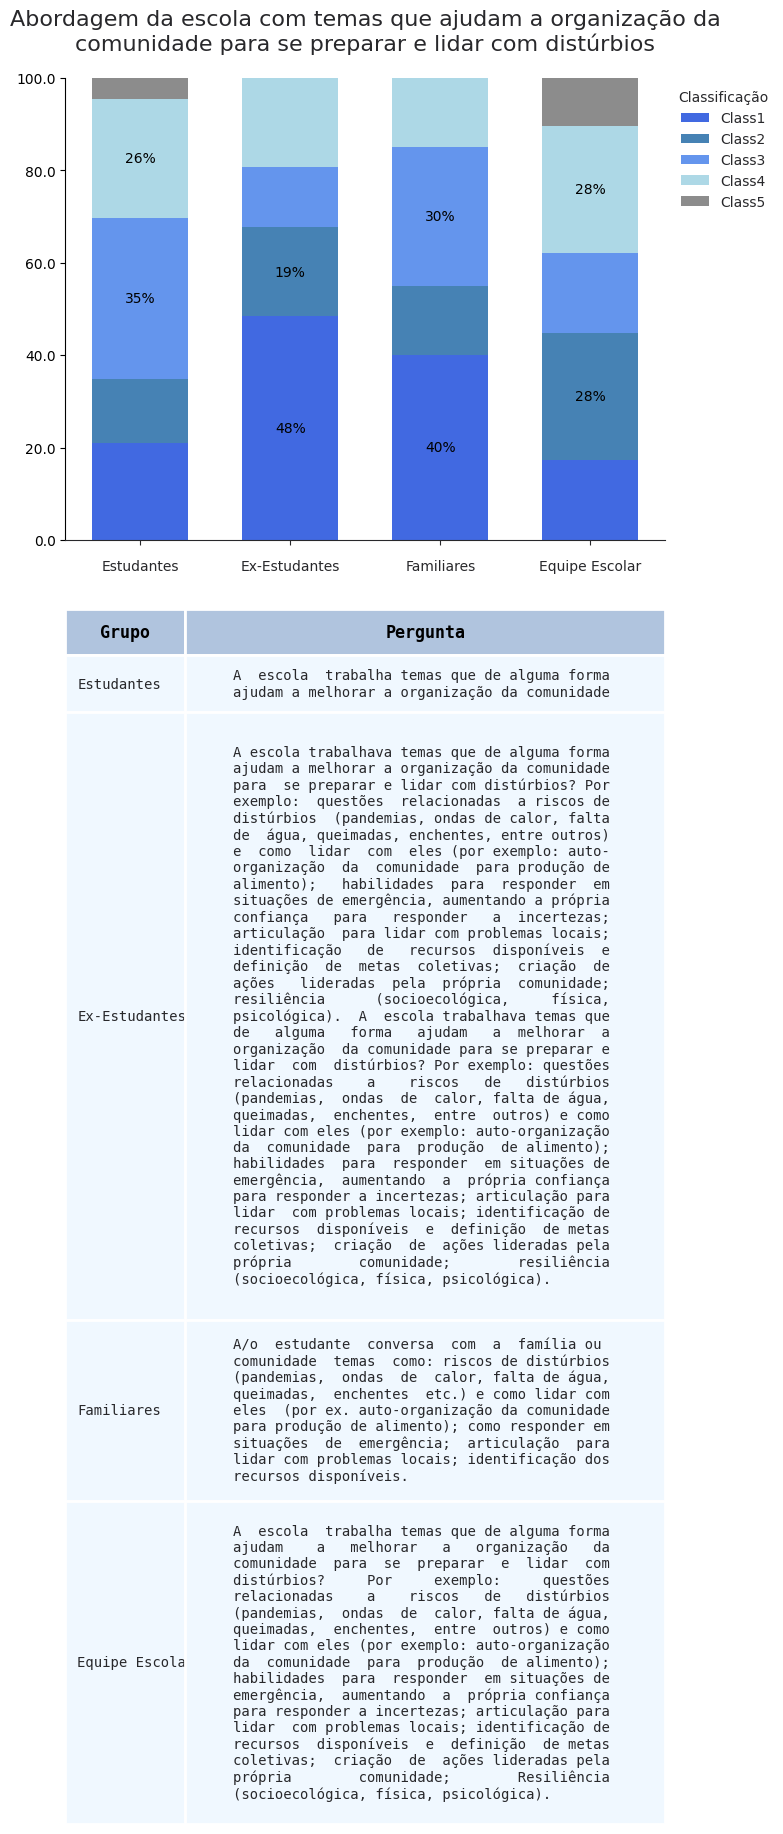

In [ ]:
# Exemplo de DataFrame com dados fictícios
df_dados = pd.DataFrame({
    'Class1': [9, 15, 8, 5],
    'Class2': [6, 6, 3, 8],
    'Class3': [15, 4, 6, 5],
    'Class4': [11, 6, 3, 8],
    'Class5': [2, 0, 0, 3]
}, index=['Estudantes', 'Ex-Estudantes', 'Familiares', 'Equipe Escolar'])

# Exemplo de DataFrame df_perg com dados fictícios
df_perg = pd.DataFrame({
    'Grupo': ['Estudantes', 'Ex-Estudantes', 'Familiares', 'Equipe Escolar'],
    'Pergunta': ['A escola trabalha temas que de alguma forma ajudam a melhorar a organização da comunidade',
                 'A escola trabalhava temas que de alguma forma ajudam a melhorar a organização da comunidade para se preparar e lidar com distúrbios? Por exemplo: questões relacionadas a riscos de distúrbios (pandemias, ondas de calor, falta de água, queimadas, enchentes, entre outros) e como lidar com eles (por exemplo: auto-organização da comunidade para produção de alimento); habilidades para responder em situações de emergência, aumentando a própria confiança para responder a incertezas; articulação para lidar com problemas locais; identificação de recursos disponíveis e definição de metas coletivas; criação de ações lideradas pela própria comunidade; resiliência (socioecológica, física, psicológica). A escola trabalhava temas que de alguma forma ajudam a melhorar a organização da comunidade para se preparar e lidar com distúrbios? Por exemplo: questões relacionadas a riscos de distúrbios (pandemias, ondas de calor, falta de água, queimadas, enchentes, entre outros) e como lidar com eles (por exemplo: auto-organização da comunidade para produção de alimento); habilidades para responder em situações de emergência, aumentando a própria confiança para responder a incertezas; articulação para lidar com problemas locais; identificação de recursos disponíveis e definição de metas coletivas; criação de ações lideradas pela própria comunidade; resiliência (socioecológica, física, psicológica).',
                 'A/o estudante conversa com a família\n ou comunidade temas como: riscos de distúrbios (pandemias, ondas de calor, falta de água, queimadas, enchentes etc.) e como lidar com eles (por ex. auto-organização da comunidade para produção de alimento); como responder em situações de emergência; articulação para lidar com problemas locais; identificação dos recursos disponíveis.',
                 'A escola trabalha temas que de alguma forma ajudam a melhorar a organização da  comunidade para se preparar e lidar com distúrbios? Por exemplo: questões relacionadas a riscos de distúrbios (pandemias, ondas de calor, falta de água, queimadas, enchentes, entre outros) e como lidar com eles (por exemplo: auto-organização da comunidade para produção de alimento); habilidades para responder em situações de emergência, aumentando a própria confiança para responder a incertezas; articulação para lidar com problemas locais; identificação de recursos disponíveis e definição de metas coletivas; criação de ações lideradas pela própria comunidade; Resiliência (socioecológica, física, psicológica).']
})

params = {'col_widths':[1, 4], 'title_height':0.1, 'table_width':1, 'space':0.15, 'edge_width':2, 'default_len_text':45, 'fontsize':[12, 10], 'height_factor':1}
title = 'Abordagem da escola com temas que ajudam a organização da comunidade para se preparar e lidar com distúrbios'
#title = textwrap.fill(str(title), width=60)
# Gerar o histograma empilhado minimalista
hist = histograma_empilhado_minimalista(df_dados, df_perg, title=title, pad_title=20, figsize=(8, 6), bar_width=0.16, params_tabela_perg=params)

### **Gráfico de Teia**

In [ ]:
def grafico_teia_minimalista(df_percentual, df_perg, top_3_maiores, top_3_menores, figsize=(10, 10), title='Gráfico de Radar',
                             new_title="", update_title=False, pad_title=10, fontsize=[16, 10, 10],
                             color_title='#28282B', lines_color=None, show_table=True, params_tabela_perg=None):
    """
    Gera um gráfico de teia (radar), exibindo a distribuição percentual de grupos em várias categorias.

    Parâmetros:
    -----------
    df_percentual : pandas.DataFrame
        DataFrame contendo os valores percentuais para cada grupo em diferentes categorias. As linhas representam os grupos
        e as colunas representam as categorias.
    df_perg : pandas.DataFrame
        DataFrame contendo as informações adicionais que serão exibidas em forma de tabela, associada ao gráfico.
    top_3_maiores : list
        Lista de categorias que representam as 3 maiores em termos de valores percentuais.
    top_3_menores : list
        Lista de categorias que representam as 3 menores em termos de valores percentuais.
    figsize : tuple, opcional
        Tamanho da figura (largura, altura). O padrão é (10, 10).
    title : str, opcional
        Título do gráfico. O padrão é 'Gráfico de Radar'.
    new_title : str, opcional
        Novo título para o gráfico, caso `update_title` seja True. Padrão é uma string vazia.
    update_title : bool, opcional
        Se True, o título do gráfico será atualizado para `new_title`. Padrão é False.
    pad_title : int, opcional
        Espaçamento entre o título e o gráfico. Padrão é 10.
    fontsize : list, opcional
        Tamanhos das fontes para [título, rótulos das categorias, valores das porcentagens]. O padrão é [16, 10, 10].
    color_title : str, opcional
        Cor do título do gráfico. O padrão é '#28282B'.
    lines_color : list, opcional
        Lista de cores para as linhas de cada grupo. Se None, utiliza cores neutras padrão. Padrão é None.
    show_table : bool, opcional
        Indica se a tabela associada ao gráfico deve ser exibida. Padrão é True.
    params_tabela_perg : dict, opcional
        Parâmetros adicionais para a função `plot_tabela_perg` caso a tabela seja exibida. Padrão é None.

    Retorno:
    --------
    matplotlib.figure.Figure
        Figura do gráfico gerado.

    Notas:
    ------
    - O gráfico exibe um gráfico de radar com até 5 níveis percentuais (0%, 20%, 40%, 60%, 80%, 100%).
    - As categorias com os 3 maiores e 3 menores valores percentuais são destacadas com cores específicas.
    - Os valores percentuais são rotacionados no gráfico para garantir que o gráfico sempre comece no topo.
    """

    categorias = list(df_percentual.columns)
    num_vars = len(categorias)

    # Verificar valores inválidos
    if df_percentual.isnull().values.any():
        df_percentual = df_percentual.fillna(0)  # Substituir NaN por 0

    # Ângulos para as categorias (em sentido horário, com a maior categoria começando no topo)
    angulos = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()

    # Girar o polígono para números ímpares de lados
    if num_vars % 2 != 0:
        angulos = [(angulo + np.pi / 2) for angulo in angulos]

    angulos += angulos[:1]  # Para fechar o gráfico

    # Criar gráfico
    fig, ax = plt.subplots(figsize=figsize, subplot_kw=dict(polar=True))

    # Adicionar linhas de porcentagem
    for i in range(1, 6):  # 0, 20, 40, 60, 80, 100
        ax.plot(angulos, [i * 20] * (num_vars + 1), color='gray', linewidth=0.8, linestyle='--', alpha=0.5)

    # Plotar cada grupo com lines_color neutras
    if lines_color is None:
        lines_color = ['#B3CDE3', '#D9D9D9', '#F6C5D9', '#CAB2D6']
    for i, grupo in enumerate(df_percentual.index):
        valores = df_percentual.iloc[i].tolist()
        valores += valores[:1]  # Completar o loop ao voltar ao primeiro ponto
        ax.plot(angulos, valores, linewidth=3, label=grupo, color=lines_color[i % len(lines_color)])  # Cores neutras

    # Ajustar as labels das categorias e colorir conforme solicitado
    for i, categoria in enumerate(categorias):
        texto_formatado = textwrap.fill(categoria, width=25)
        if categoria in top_3_maiores:
            ax.text(angulos[i], df_percentual.max().max() + 5, texto_formatado, color='#93C47D', fontsize=fontsize[1], fontweight='bold', ha='center', va='center')
        elif categoria in top_3_menores:
            ax.text(angulos[i], df_percentual.max().max() + 5, texto_formatado, color='#FF7F7F', fontsize=fontsize[1], fontweight='bold', ha='center', va='center')
        else:
            ax.text(angulos[i], df_percentual.max().max() + 5, texto_formatado, color='gray', fontsize=fontsize[1], ha='center', va='center')

    # Remover os números ao redor do gráfico
    ax.set_yticks([])

    # Adicionar valores de porcentagem no topo (não afetado pela rotação)
    angulo_topo = np.pi / 2
    for i in range(0, 101, 20):  # Valores de 0 a 100 com intervalo de 20
        ax.text(angulo_topo, i, str(i), ha='center', va='center', fontsize=fontsize[2], color='black')

    # Configurações do gráfico
    ax.set_xticks([])
    if update_title:
        title = new_title
    wrapped_title = textwrap.fill(title, width=50) # Ajuste o `width` conforme necessário
    plt.title(wrapped_title, fontsize=fontsize[0], pad=pad_title, color=color_title)
    #plt.title(title, fontsize=fontsize[0], pad=pad_title, color=color_title)
    plt.legend(title='Grupos', loc='upper right', bbox_to_anchor=(1.1, 1.1))

    # Limpar bordas e remover círculos
    ax.spines['polar'].set_visible(False)
    ax.yaxis.grid(False)
    ax.xaxis.grid(False)

    if params_tabela_perg and show_table:
        plot_tabela_perg(ax, df_perg, fig_grafico=figsize, fig_padrao=(8, 8), **params_tabela_perg)

    plt.show()

    return fig


## Funções para unificar a geração e salvar os gráficos

In [ ]:
# @title Salvando dataframes em um único arquivo

# Converter todas as colunas em string para df_equipe_escolar
df_equipe_escolar3 = df_equipe_escolar3.astype(str)
# Converter todas as colunas em string para df_estudantes
df_estudantes3 = df_estudantes3.astype(str)
# Converter todas as colunas em string para df_ex_estudantes
df_ex_estudantes3 = df_ex_estudantes3.astype(str)
# Converter todas as colunas em string para df_familiares
df_familiares3 = df_familiares3.astype(str)
# Converter todas as colunas em string para df_consulta
df_consulta2 = df_consulta2.astype(str)

try:
  if loaded_dataframes != None:
    pass
except:
    file_path_arquivo_completo = 'dataframes_e_parametros.h5'

    # Caminho do arquivo onde os DataFrames serão salvos

    # Dicionário com os DataFrames
    dataframes = {
        'df_consulta2': df_consulta2,
        'df_estudantes3': df_estudantes3,
        'df_ex_estudantes3': df_ex_estudantes3,
        'df_familiares3': df_familiares3,
        'df_equipe_escolar3': df_equipe_escolar3
    }

    # Salvar os DataFrames no arquivo HDF5
    with pd.HDFStore(file_path_arquivo_completo, mode='w') as store:
        for name, df in dataframes.items():
            print(name)
            store.put(name, df, format='table')

    print(f"DataFrames salvos com sucesso em {file_path_arquivo_completo}.")

transform_null_values(df_consulta2)
transform_null_values(df_estudantes3)
transform_null_values(df_ex_estudantes3)
transform_null_values(df_familiares3)
transform_null_values(df_equipe_escolar3)

df_consulta2
df_estudantes3
df_ex_estudantes3
df_familiares3
df_equipe_escolar3
DataFrames salvos com sucesso em dataframes_e_parametros.h5.


,Unnamed: 0,Carimbo de data/hora,Há quanto tempo trabalha na escola? [0.7],Atribuição na escola,Você mora em: [0.8],Com qual gênero você se identifica?,"Dentre as alternativas, você se reconhece ou se identifica com qual cor/raça/etnia? (critérios do IBGE)","1.\tVocê considera importante o aprendizado quanto a identificar as características, o estado de conservação e as diversidades de elementos da paisagem onde se vive? [1.1.1]",2.\tVocê considera que a escola trabalha com o entendimento e a percepção da paisagem e de sua diversidade? [1.1.2],3.\tVocê considera que a escola incentiva que as/os estudantes compartilhem esses aprendizados (percepção da paisagem e de sua diversidade) com outras pessoas da família e/ou comunidade? [1.1.3],...,"1.\tA escola incentiva as/os estudantes a se engajarem para melhorar as necessidades (educação, água potável, saúde, feiras livres, produção agrícola) de suas comunidades? Por exemplo: auto-organização da comunidade, mobilização comunitária, buscar apoio institucional, cobrar do governo. [4.4.1]","2.\tA escola trabalha com temas como direitos e deveres das comunidades em relação à governança ambiental (água, terra, produção agrícola)? [4.4.3]","3.\tA escola incentiva as/os estudantes a mostrarem para suas comunidades a relação entre saúde humana e qualidade ambiental? Por exemplo: ocorrência de doenças, poluição, falta de água limpa, vulnerabilidade a desastres. [4.4.4]","4.\tPara você, a escola incentiva que as/os estudantes contribuam com o gerenciamento local dos elementos da paisagem existentes em suas comunidades? [4.4.6]","5.\tA divisão de tarefas e os processos de tomada de decisão das ações coletivas são justos e igualitários para todas as/os estudantes e profissionais da escola, independentemente de gênero, idade, grupo social, origem? Cada pessoa é escutada e considerada de forma igual nas decisões? [4.4.7]",6.\tNa sua atuação escolar você incentiva as/os estudantes a promoverem a igualdade de direitos e de participação das diferentes pessoas da comunidade? [4.4.10],"Espaço livre caso queira complementar algo quanto à contribuição das práticas escolares para a auto-organização, governança, equidade social e bem estar da comunidade. [4.5]",1.\tQuais das seguintes práticas vivenciadas na escola você considera que MAIS AJUDAM no aprendizado para resiliência socioecológica (capacidade da comunidade - em seus aspectos sociais e ecológicos - de lidar com desafios)? [5.1],2.\tO QUE PRECISA MELHORAR OU SER IMPLEMENTADO para ajudar no aprendizado para resiliência socioecológica? [5.1b],"3.\tVocê tem sugestão de outras práticas escolares (conteúdo e atividades, práticas, gestão etc.) que possam ajudar na aprendizagem para resiliência socioecológica?"
0,0,2021-10-29 12:03:35.530,Mais de 4 anos,Docência,Propriedade rural,Masculino,Branco (a),Bastante,Bastante,Bastante,...,Bastante,Bastante,Bastante,Bastante,Bastante,Bastante,None,Conteúdo curricular da área de conhecimento: C...,Conteúdo curricular da área de conhecimento: C...,Participação maior da escola com a parte técni...
1,1,2021-11-05 09:37:04.984,De 2 a 4 anos,Docência,Propriedade rural,Feminino,Branco (a),Bastante,Bastante,Bastante,...,Bastante,Bastante,Bastante,Bastante,Bastante,Bastante,None,Conteúdo curricular da área de conhecimento: C...,Conteúdo curricular da área de conhecimento: L...,Primeiros socorros.
2,2,2021-11-05 10:11:26.165,Mais de 4 anos,Coordenação pedagógica,Área urbana,Masculino,Pardo (a),Bastante,Bastante,Bastante,...,Bastante,Bastante,Bastante,Bastante,Bastante,Bastante,None,Conteúdo curricular da área de conhecimento: C...,Politicas públicas para fomentar as práticas a...,Sim. Maior atuação técnica dos estudantes em s...
3,3,2021-11-09 20:07:46.105,De 1 a 2 anos,Assistência técnica,Área urbana,Masculino,Pardo (a),Bastante,Bastante,Bastante,...,Bastante,Bastante,Bastante,Bastante,Bastante,Bastante,.,Conteúdo curricular da área de conhecimento: C...,Conteúdo curricular da área de conhecimento: C...,.
4,4,2021-11-09

In [ ]:
# @title Gerar gráfico (Função Corrigida)

def gerar_grafico2(df_consulta, df_estudantes, df_ex_estudantes, df_familiares, df_equipe_escolar, numero_grafico, tabela_no_final_de_todos=False, params_histograma_grafico=None, params_tabela_perg=None, params_teia_grafico=None, params_tabela_quadro=None):
    """
    Gera um ou mais gráficos e retorna uma lista simples de objetos de figura.
    """
    all_figs = []

    for n, numero in enumerate(numero_grafico):
        numero_strip = numero.strip()
        linha_consulta = df_consulta[df_consulta['No do gráfico'] == numero_strip]

        if linha_consulta.empty:
            continue

        indice_linha = linha_consulta.index[0]
        tipo_grafico = linha_consulta.loc[indice_linha, 'Tipo de gráfico']
        title = linha_consulta.loc[indice_linha, 'Título do gráfico']
        if title is None: title = ''

        colunas_ajustadas = buscar_nomes_colunas(numero_strip, df_estudantes, df_ex_estudantes, df_familiares, df_equipe_escolar)

        groups = ['Estudantes', 'Ex-Estudantes', 'Familiares', 'Equipe Escolar']
        dataframes = [df_estudantes, df_ex_estudantes, df_familiares, df_equipe_escolar]

        len_data = pd.Series({
            groups[0]: len(dataframes[0]) if dataframes[0] is not None else 0,
            groups[1]: len(dataframes[1]) if dataframes[1] is not None else 0,
            groups[2]: len(dataframes[2]) if dataframes[2] is not None else 0,
            groups[3]: len(dataframes[3]) if dataframes[3] is not None else 0
        })

        df_perg = pd.DataFrame({'Grupo': [], 'Pergunta': []})

        fig = None

        if tipo_grafico == 'Barra':
            contagens = {}
            for i, group in enumerate(groups):
                if group in colunas_ajustadas and colunas_ajustadas[group] is not None:
                    texto_perg = ''
                    for j, coluna in enumerate(colunas_ajustadas[group]):
                        group_name = f"{group} ({chr(97 + j)})" if len(colunas_ajustadas[group]) > 1 else group
                        new_col_name = re.sub(r'^\\d+[a-zA-Z]?\\.\\t?', '', coluna)
                        texto_perg += f"({chr(97 + j)}) {new_col_name}\n" if len(colunas_ajustadas[group]) > 1 else f"{new_col_name}\n"
                        contagens[group_name] = dataframes[i][coluna].value_counts(normalize=True).sort_index() * 100
                    df_perg.loc[len(df_perg)] = [group, texto_perg]

            df_grafico = pd.DataFrame(contagens).T
            df_perg['Pergunta'] = df_perg['Pergunta'].str.replace(r'\\[\\d+(\\.\\d+)*[a-zA-Z]*\\]', '', regex=True)

            if not df_grafico.empty:
                fig = histograma_empilhado_minimalista(df_grafico, df_perg, title=title, params_tabela_perg=params_tabela_perg, **params_histograma_grafico)
            all_figs.append(fig)

        elif tipo_grafico == 'Teia':
            figs_teia = []
            num_ele = len(colunas_ajustadas.get('Estudantes', []))
            for i in range(num_ele):
                contagens_teia = {}
                todas_categorias = set()
                df_perg_teia = pd.DataFrame({'Grupo': [], 'Pergunta': []})

                for grupo, dataframe in zip(groups, dataframes):
                    if grupo in colunas_ajustadas and colunas_ajustadas[grupo] is not None and i < len(colunas_ajustadas[grupo]):
                        coluna = colunas_ajustadas[grupo][i]
                        opcoes = dataframe[coluna].dropna()
                        categorias_verificadas = opcoes.apply(lambda x: verificar_categoria(x))
                        contagem = categorias_verificadas.explode().value_counts()
                        contagens_teia[grupo] = contagem
                        todas_categorias.update(contagem.index)
                        df_perg_teia.loc[len(df_perg_teia)] = [grupo, coluna]

                df_teia = pd.DataFrame(contagens_teia).T.reindex(columns=sorted(list(todas_categorias)), fill_value=0).fillna(0)
                df_percentual = df_teia.div(len_data, axis=0) * 100

                if not df_percentual.empty:
                    somas_percentuais = df_percentual.sum(axis=0)
                    top_3_maiores = somas_percentuais.nlargest(3).index.tolist()
                    top_3_menores = somas_percentuais.nsmallest(3).index.tolist()
                    df_perg_teia['Pergunta'] = df_perg_teia['Pergunta'].str.replace(r'\\[\\d+(\\.\\d+)*[a-zA-Z]*\\]', '', regex=True)

                    fig_i = grafico_teia_minimalista(df_percentual, df_perg_teia, top_3_maiores, top_3_menores, title=title, params_tabela_perg=params_tabela_perg, **params_teia_grafico)
                    figs_teia.append(fig_i)

            if figs_teia:
                all_figs.extend(figs_teia)

        elif tipo_grafico == 'Quadro de respostas abertas':
            data = {}
            for i, group in enumerate(groups):
                coluna = colunas_ajustadas.get(group)
                if coluna:
                    respostas = dataframes[i][coluna[0]].dropna().tolist()
                    if respostas:
                        data[group] = respostas

            df_data = pd.DataFrame(dict([(k, pd.Series(v)) for k, v in data.items()]))
            df_data = df_data.applymap(replace_inutile).dropna(axis=1, how='all')

            if not df_data.empty:
                fig = plot_tabela(df_data, title=title, **params_tabela_quadro)
            all_figs.append(fig)

    return all_figs

In [ ]:
# @title Reamover frases sem relevância

palavras_inuteis = ["não", "nada", "n", "não sei", "sei lá", "não tenho nada a dizer", "acho que não",
                    "ok", "sim", "tá bom", "tá certo", "naum", "nops", "só isso", "None"]

# Função para normalizar e remover acentos
def remover_acentos(texto):
    return ''.join(c for c in unicodedata.normalize('NFD', texto) if unicodedata.category(c) != 'Mn')

# Função para verificar se uma palavra é semelhante a alguma das palavras inúteis
def similaridade_palavra(palavra, lista_palavras):
    for item in lista_palavras:
        # Calcula a similaridade entre as palavras
        if difflib.SequenceMatcher(None, palavra, item).ratio() >= 0.7:  # Ajuste o limiar conforme necessário
            return True
    return False

# Substitui as respostas que contêm palavras inúteis por None se o tamanho for menor ou igual ao dobro da palavra
def replace_inutile(cell):
    cell_str = str(cell)
    cell_str_unaccented = remover_acentos(cell_str.lower())

    # Verifica se a célula é menor que 3 caracteres
    if len(cell_str) < 3:
        return None

    for palavra in palavras_inuteis:
        palavra_unaccented = remover_acentos(palavra.lower())
        # Verifica se a palavra é igual ou similar a uma palavra inútil
        if palavra_unaccented in cell_str_unaccented or similaridade_palavra(cell_str_unaccented, [palavra_unaccented]):
            if len(cell_str) <= len(palavra) * 2:
                return None
    return cell

In [ ]:
# @title Salvar ou carregar dataframe em arquivo

def save_or_load_dataframes(operation, key, data=None, file_path='dataframes_e_parametros.h5'):
    if operation == 'save':
        # Salvar o dicionário como DataFrame no arquivo HDF5
        params_df = pd.DataFrame(list(data.items()), columns=['chave', 'valor'])

        with pd.HDFStore(file_path, mode='a') as store:
            store.put(key, params_df)

        print(f"Dicionário armazenado no arquivo {file_path} com chave '{key}'.")

    elif operation == 'load':
        # Carregar o dicionário do arquivo HDF5
        with pd.HDFStore(file_path, mode='r') as store:
            params_df_loaded = store.get(key)

        return dict(zip(params_df_loaded['chave'], params_df_loaded['valor']))

    else:
        raise ValueError("O parâmetro 'operation' deve ser 'save' ou 'load'.")

In [ ]:
# @title Salvar ou carregar configurações em arquivo
def save_or_load_config(operation, numero_grafico, data=None, file_path='dataframes_e_parametros.h5'):
    if operation == 'save':
        with pd.HDFStore(file_path, mode='a') as store:
            store.put(numero_grafico, pd.DataFrame([data]))

        print(f"Configuração do gráfico {numero_grafico} salva.")

    elif operation == 'load':
      try:
        with pd.HDFStore(file_path, mode='r') as store:
            config_df_loaded = store.get(numero_grafico)
            return config_df_loaded.to_dict('records')[0]
      except:
        return None

In [ ]:
# @title Para o gráfico de teia múltiplo, unifica as imagens.

def save_figure(fig, filename=None, show=False):
    """
    Salva uma figura matplotlib como imagem ou a exibe, dependendo do parâmetro `show`.
    """
    if show:
        fig.show()  # Mostra a figura diretamente
    else:
        fig.savefig(filename, bbox_inches='tight')
        print(f"Figura salva como: {filename}")
    plt.close(fig)  # Fecha a figura para liberar memória

def combine_figures_vertically(list_of_fig_lists, output_prefix='output', show=False):
    """
    Combina figuras de duas listas verticalmente e exibe ou salva a combinação dependendo de `show`.
    """
    for idx, (fig1, fig2) in enumerate(zip(*list_of_fig_lists)):
        # Salva as figuras como imagens temporárias
        save_figure(fig1, 'temp1.png')
        save_figure(fig2, 'temp2.png')

        # Carrega as imagens com Pillow
        img1 = Image.open('temp1.png')
        img2 = Image.open('temp2.png')

        # Define o tamanho da nova imagem combinada
        width = max(img1.width, img2.width)
        height = img1.height + img2.height

        # Cria a nova imagem com altura combinada
        combined_img = Image.new('RGB', (width, height), (255, 255, 255))
        combined_img.paste(img1, (0, 0))  # Cola a primeira imagem
        combined_img.paste(img2, (0, img1.height))  # Cola a segunda imagem abaixo

        if show:
            # Mostra a imagem combinada usando Matplotlib
            plt.figure(figsize=(width / 100, height / 100))  # Ajusta o tamanho da exibição
            plt.imshow(combined_img)
            plt.axis('off')  # Remove os eixos
            plt.show()
        else:
            # Salva cada combinação com um nome único
            output_filename = f"{output_prefix}_{idx}.png"
            combined_img.save(output_filename)
            print(f"Figura combinada salva como: {output_filename}")


# UI Para Ajustar Gráficos - Executar Sempre.

### **Quadro de respostas**

In [ ]:
# Formulário de Configurações para Gerar a Tabela

# @title Configurações do Quadro de Respostas

# @markdown *Sempre execute esta célula.*
Largura_da_imagem = 12  # @param {type:"number"}
Aumento_da_altura_das_celulas = 1  # @param {type:"number"}
Tamanho_das_bordas = 2  # @param {type:"number"}
Tamanho_fonte_header = 12  # @param {type:"number"}
Tamanho_fonte_texto = 10  # @param {type:"number"}
Tamanho_fonte_titulo = 16  # @param {type:"number"}
Qtd_caracteres_por_linha = 80 # @param {type:"number"}
Margem_titulo = 0  # @param {type:"number"}

# @markdown ---
# @markdown **Valores Padrão:** Largura_da_imagem = 12, Aumento_da_altura_das_celulas = 1, Tamanho_das_bordas = 2, Tamanho_fonte_header = 12, Tamanho_fonte_texto = 10, Tamanho_fonte_titulo = 16, Qtd_caracteres_por_linha = 80, Margem_titulo = 0.

In [ ]:
# @title Selecione as cores do título, célula do cabeçalho, células de texto e cor da borda.
import ipywidgets as widgets
from IPython.display import display

# Criando os seletores de cores com ipywidgets
color_title_seletor = widgets.ColorPicker(
    value='black',  # Cor padrão
    description='Título:',
    disabled=False
)

head_color_seletor = widgets.ColorPicker(
    value='#b0c4de',  # Cor padrão
    description='Header:',
    disabled=False
)

cell_color_seletor = widgets.ColorPicker(
    value='#f0f8ff',  # Cor padrão
    description='Célula:',
    disabled=False
)

edge_color_seletor = widgets.ColorPicker(
    value='white',  # Cor padrão
    description='Borda:',
    disabled=False
)

# Função para resetar as cores para os valores padrão
def resetar_cores(event):
    color_title_seletor.value = 'black'
    head_color_seletor.value = '#b0c4de'
    cell_color_seletor.value = '#f0f8ff'
    edge_color_seletor.value = 'white'

# Criando o botão de reset
botao_resetar = widgets.Button(
    description="Resetar Cores",
    button_style='',  # 'success', 'info', 'warning', 'danger' ou ''
    tooltip='Clique para resetar as cores',
    icon='refresh'  # Ícone do FontAwesome (opcional)
)

# Conectando o botão à função
botao_resetar.on_click(resetar_cores)

# Exibindo os widgets
display(color_title_seletor)
display(head_color_seletor)
display(cell_color_seletor)
display(edge_color_seletor)
print()
display(botao_resetar)

ColorPicker(value='black', description='Título:')

ColorPicker(value='#b0c4de', description='Header:')

ColorPicker(value='#f0f8ff', description='Célula:')

ColorPicker(value='white', description='Borda:')

Button(description='Resetar Cores', icon='refresh', style=ButtonStyle(), tooltip='Clique para resetar as cores…

In [ ]:
# @title **Aplicar Mudanças**

params_tabela = {
    'fig_col_width': Largura_da_imagem,
    'height_factor': Aumento_da_altura_das_celulas,
    'edge_width': Tamanho_das_bordas,
    'fontsize': [Tamanho_fonte_titulo, Tamanho_fonte_header, Tamanho_fonte_texto],
    'default_len_text': Qtd_caracteres_por_linha,
    'pad_title': Margem_titulo,
    'color_title': color_title_seletor.value,
    'head_color': head_color_seletor.value,
    'cell_color': cell_color_seletor.value,
    'edge_color': edge_color_seletor.value
}

save_or_load_dataframes('save', 'params_tabela', params_tabela, file_path=file_path_arquivo_completo)

Dicionário armazenado no arquivo dataframes_e_parametros.h5 com chave 'params_tabela'.


/tmp/ipython-input-28-3047614171.py:9: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed-integer,key->block0_values] [items->Index(['chave', 'valor'], dtype='object')]

  store.put(key, params_df)


### **Tabela de Perguntas**

In [ ]:
# Formulário de Configurações para Gerar a Tabela

# @title Configurações da Tabela de Perguntas

# @markdown *Sempre execute esta célula.*
Proporcao_largura_coluna_grupos = 1  # @param {type:"number"}
Proporcao_largura_coluna_perguntas = 3.5  # @param {type:"number"}
Altura_das_celula_header = 0.1  # @param {type:"number"}
Espaco_entre_grafico_e_tabela = 0.15  # @param {type:"number"}
Tamanho_das_bordas = 2  # @param {type:"number"}
Qtd_caracteres_por_linha = 45 # @param {type:"number"}
Fator_aumento_altura = 1 # @param {type:"number"}
Largura_tabela = 1 # @param {type:"number"}

# @markdown ---
# @markdown **Valores Padrão:** Proporcao_largura_coluna_grupos = 1, Proporcao_largura_coluna_perguntas = 3.5, Altura_das_celula_header = 0.1, Espaco_entre_grafico_e_tabela = 0.15, Tamanho_das_bordas = 2, Qtd_caracteres_por_linha = 45, Fator_aumento_altura = 1, Largura_tabela = 1.


In [ ]:
# @title Selecione as cores
import ipywidgets as widgets
from IPython.display import display

head_color_seletor = widgets.ColorPicker(
    value='#b0c4de',  # Cor padrão
    description='Header:',
    disabled=False
)

cell_color_seletor = widgets.ColorPicker(
    value='#f0f8ff',  # Cor padrão
    description='Célula:',
    disabled=False
)

edge_color_seletor = widgets.ColorPicker(
    value='white',  # Cor padrão
    description='Borda:',
    disabled=False
)

# Função para resetar as cores para os valores padrão
def resetar_cores(event):
    head_color_seletor.value = '#b0c4de'
    cell_color_seletor.value = '#f0f8ff'
    edge_color_seletor.value = 'white'

# Criando o botão de reset
botao_resetar = widgets.Button(
    description="Resetar Cores",
    button_style='',  # 'success', 'info', 'warning', 'danger' ou ''
    tooltip='Clique para resetar as cores',
    icon='refresh'  # Ícone do FontAwesome (opcional)
)

# Conectando o botão à função
botao_resetar.on_click(resetar_cores)

# Exibindo os widgets
display(head_color_seletor)
display(cell_color_seletor)
display(edge_color_seletor)
print()
display(botao_resetar)

ColorPicker(value='#b0c4de', description='Header:')

ColorPicker(value='#f0f8ff', description='Célula:')

ColorPicker(value='white', description='Borda:')

Button(description='Resetar Cores', icon='refresh', style=ButtonStyle(), tooltip='Clique para resetar as cores…

In [ ]:
# @title **Aplicar Mudanças**
params_tabela_perg = {
    "col_widths": [Proporcao_largura_coluna_grupos, Proporcao_largura_coluna_perguntas],
    "title_height": Altura_das_celula_header,
    "space": Espaco_entre_grafico_e_tabela,
    "edge_width": Tamanho_das_bordas,
    "default_len_text": Qtd_caracteres_por_linha,
    'height_factor': Fator_aumento_altura,
    'table_width': Largura_tabela,
    'head_color': head_color_seletor.value,
    'cell_color': cell_color_seletor.value,
    'edge_color': edge_color_seletor.value
}

save_or_load_dataframes('save', 'params_tabela_perg', params_tabela_perg, file_path=file_path_arquivo_completo)

Dicionário armazenado no arquivo dataframes_e_parametros.h5 com chave 'params_tabela_perg'.


/tmp/ipython-input-28-3047614171.py:9: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed-integer,key->block0_values] [items->Index(['chave', 'valor'], dtype='object')]

  store.put(key, params_df)


### **Gráfico de Barras**

In [ ]:
# Formulário de Configurações para Gerar a Tabela

# @title Configurações do Gráfico de Barras

# @markdown *Sempre execute esta célula.*
Altura_da_imagem = 8  # @param {type:"number"}
Largura_da_imagem = 6  # @param {type:"number"}
Tamanho_barras = 0.16  # @param {type:"number"}
Margem_titulo = 20  # @param {type:"number"}
Tamanho_fonte_titulo = 16  # @param {type:"number"}
Tamanho_fonte_porcentagens = 10  # @param {type:"number"}
Tamanho_fonte_titulo_legenda = 10  # @param {type:"number"}
Tamanho_fonte_texto_legenda = 10  # @param {type:"number"}
# @markdown ---
# @markdown **Valores Padrão:** Altura_da_imagem = 8, Largura_da_imagem = 6, Tamanho_barras = 0.16, Margem_titulo = 20, Tamanho_fonte_titulo = 16, Tamanho_fonte_porcentagens = 10, Tamanho_fonte_titulo_legenda = 10, Tamanho_fonte_texto_legenda = 10



In [ ]:
# @title Troque as cores das barras
import ipywidgets as widgets
from IPython.display import display

# Criando os seletores de cores com ipywidgets
class_bastante_color = widgets.ColorPicker(
    value='#4169e1',  # Cor padrão
    description='Bastante:',
    disabled=False
)

class_medio_color = widgets.ColorPicker(
    value='#4682b4',  # Cor padrão
    description='Médio:',
    disabled=False
)

class_pouco_color = widgets.ColorPicker(
    value='#6495ed',  # Cor padrão
    description='Pouco:',
    disabled=False
)


class_nada_color = widgets.ColorPicker(
    value='#add8e6',  # Cor padrão
    description='Nada:',
    disabled=False
)

# Função para resetar as cores para os valores padrão
def resetar_cores(event):
    class_bastante_color.value = '#4169e1'
    class_medio_color.value = '#4682b4'
    class_pouco_color.value = '#6495ed'
    class_nada_color.value = '#add8e6'

# Criando o botão de reset
botao_resetar = widgets.Button(
    description="Resetar Cores",
    button_style='',  # 'success', 'info', 'warning', 'danger' ou ''
    tooltip='Clique para resetar as cores',
    icon='refresh'  # Ícone do FontAwesome (opcional)
)

# Conectando o botão à função
botao_resetar.on_click(resetar_cores)

# Exibindo os widgets
display(class_bastante_color)
display(class_medio_color)
display(class_pouco_color)
display(class_nada_color)
print()
display(botao_resetar)

ColorPicker(value='#4169e1', description='Bastante:')

ColorPicker(value='#4682b4', description='Médio:')

ColorPicker(value='#6495ed', description='Pouco:')

ColorPicker(value='#add8e6', description='Nada:')

Button(description='Resetar Cores', icon='refresh', style=ButtonStyle(), tooltip='Clique para resetar as cores…

In [ ]:
# @title Troque as cores do título e dos textos das porcentagens nas barras.
import ipywidgets as widgets
from IPython.display import display

# Criando os seletores de cores com ipywidgets
hist_percent_text_color = widgets.ColorPicker(
    value='black',  # Cor padrão
    description='Título:',
    disabled=False
)

hist_title_color = widgets.ColorPicker(
    value='#28282B',  # Cor padrão
    description='Porcentagem:',
    disabled=False
)

# Função para resetar as cores para os valores padrão
def resetar_cores(event):
    hist_percent_text_color.value = 'black'
    hist_title_color.value = '#28282B'

# Criando o botão de reset
botao_resetar = widgets.Button(
    description="Resetar Cores",
    button_style='',  # 'success', 'info', 'warning', 'danger' ou ''
    tooltip='Clique para resetar as cores',
    icon='refresh'  # Ícone do FontAwesome (opcional)
)

# Conectando o botão à função
botao_resetar.on_click(resetar_cores)

# Exibindo os widgets
display(hist_percent_text_color)
display(hist_title_color)
print()
display(botao_resetar)

ColorPicker(value='black', description='Título:')

ColorPicker(value='#28282B', description='Porcentagem:')

Button(description='Resetar Cores', icon='refresh', style=ButtonStyle(), tooltip='Clique para resetar as cores…

In [ ]:
# @title **Aplicar Mudanças**

try:
  bar_colors = [class_bastante_color.value, class_medio_color.value, class_pouco_color.value, class_nada_color.value]
except:
  bar_color = None

try:
  percent_text_color = hist_percent_text_color.value
  color_title = hist_title_color.value
except:
  percent_text_color='black'
  color_title='#28282B'

# Configurações do gráfico
params_histograma_grafico = {
    "figsize": [Altura_da_imagem, Largura_da_imagem],
    "bar_width": Tamanho_barras,
    "pad_title": Margem_titulo,
    "fontsize": [Tamanho_fonte_titulo, Tamanho_fonte_porcentagens, Tamanho_fonte_titulo_legenda, Tamanho_fonte_texto_legenda],
    "bar_colors": bar_colors,
    "percent_text_color": percent_text_color,
    "color_title": color_title
}

save_or_load_dataframes('save', 'params_histograma_grafico', params_histograma_grafico, file_path=file_path_arquivo_completo)

/tmp/ipython-input-28-3047614171.py:9: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed-integer,key->block0_values] [items->Index(['chave', 'valor'], dtype='object')]

  store.put(key, params_df)


Dicionário armazenado no arquivo dataframes_e_parametros.h5 com chave 'params_histograma_grafico'.


### **Gráfico de Teia**

In [ ]:
# Formulário de Configurações para Gerar a Tabela

# @title Configurações do Gráfico de Teia

# @markdown *Sempre execute esta célula.*
Altura_da_imagem = 10  # @param {type:"number"}
Largura_da_imagem = 10  # @param {type:"number"}
Margem_titulo = 20  # @param {type:"number"}
Tamanho_fonte_titulo = 16  # @param {type:"number"}
Tamanho_fonte_categorias = 11  # @param {type:"number"}
Tamanho_fonte_valores = 12  # @param {type:"number"}
# @markdown ---
# @markdown **Valores Padrão:** Altura_da_imagem = 10, Largura_da_imagem = 10, Margem_titulo = 20, Tamanho_fonte_titulo = 16, Tamanho_fonte_categorias = 11, Tamanho_fonte_valores = 12

In [ ]:
# @title Troque as cores das linhas do gráfico de teia.
import ipywidgets as widgets
from IPython.display import display

# Criando os seletores de cores com ipywidgets
group1_color = widgets.ColorPicker(
    value='#B3CDE3',  # Cor padrão
    description='Grupo 1:',
    disabled=False
)

group2_color = widgets.ColorPicker(
    value='#D9D9D9',  # Cor padrão
    description='Grupo 2:',
    disabled=False
)

group3_color = widgets.ColorPicker(
    value='#F6C5D9',  # Cor padrão
    description='Grupo 3:',
    disabled=False
)


group4_color = widgets.ColorPicker(
    value='#CAB2D6',  # Cor padrão
    description='Grupo 4:',
    disabled=False
)

# Função para resetar as cores para os valores padrão
def resetar_cores(event):
    group1_color.value = '#B3CDE3'
    group2_color.value = '#D9D9D9'
    group3_color.value = '#F6C5D9'
    group4_color.value = '#CAB2D6'

# Criando o botão de reset
botao_resetar = widgets.Button(
    description="Resetar Cores",
    button_style='',  # 'success', 'info', 'warning', 'danger' ou ''
    tooltip='Clique para resetar as cores',
    icon='refresh'  # Ícone do FontAwesome (opcional)
)

# Conectando o botão à função
botao_resetar.on_click(resetar_cores)

# Exibindo os widgets
display(group1_color)
display(group2_color)
display(group3_color)
display(group4_color)
print()
display(botao_resetar)

ColorPicker(value='#B3CDE3', description='Grupo 1:')

ColorPicker(value='#D9D9D9', description='Grupo 2:')

ColorPicker(value='#F6C5D9', description='Grupo 3:')

ColorPicker(value='#CAB2D6', description='Grupo 4:')

Button(description='Resetar Cores', icon='refresh', style=ButtonStyle(), tooltip='Clique para resetar as cores…

In [ ]:
# @title Troque a cor do título.
import ipywidgets as widgets
from IPython.display import display

teia_title_color = widgets.ColorPicker(
    value='#28282B',  # Cor padrão
    description='Title:',
    disabled=False
)

# Função para resetar as cores para os valores padrão
def resetar_cores(event):
    teia_title_color.value = '#28282B'

# Criando o botão de reset
botao_resetar = widgets.Button(
    description="Resetar Cores",
    button_style='',  # 'success', 'info', 'warning', 'danger' ou ''
    tooltip='Clique para resetar as cores',
    icon='refresh'  # Ícone do FontAwesome (opcional)
)

# Conectando o botão à função
botao_resetar.on_click(resetar_cores)

# Exibindo os widgets
display(teia_title_color)
print()
display(botao_resetar)

ColorPicker(value='#28282B', description='Title:')

Button(description='Resetar Cores', icon='refresh', style=ButtonStyle(), tooltip='Clique para resetar as cores…

In [ ]:
# @title **Aplicar Mudanças**

try:
  lines_color = [group1_color.value, group2_color.value, group3_color.value, group4_color.value]
except:
  lines_color = None

try:
  color_title = teia_title_color.value
except:
  color_title='#28282B'

# Configurações do gráfico
params_teia_grafico = {
    "figsize": [Altura_da_imagem, Largura_da_imagem],
    "pad_title": Margem_titulo,
    "fontsize": [Tamanho_fonte_titulo, Tamanho_fonte_categorias, Tamanho_fonte_valores],
    "lines_color": lines_color,
    "color_title": color_title
}

save_or_load_dataframes('save', 'params_teia_grafico', params_teia_grafico, file_path=file_path_arquivo_completo)

Dicionário armazenado no arquivo dataframes_e_parametros.h5 com chave 'params_teia_grafico'.


/tmp/ipython-input-28-3047614171.py:9: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed-integer,key->block0_values] [items->Index(['chave', 'valor'], dtype='object')]

  store.put(key, params_df)


# Gerar Gráficos, Imagens .png e PDF's e Arquivo Geral de Configurações.

Usando valores padrão para o gráfico


/tmp/ipython-input-22-2038277489.py:104: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticks(), fontsize=fontsize[1])


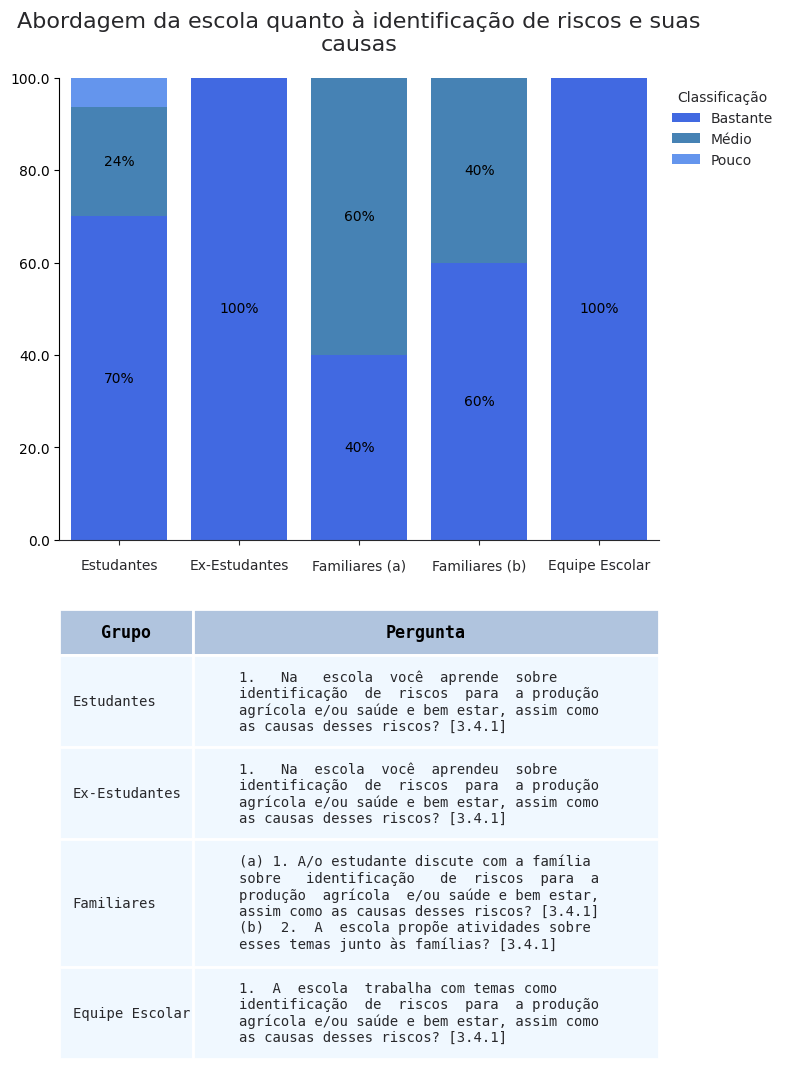

In [ ]:
# Formulário de Configurações para Gerar a Tabela

# @title Gerar um Gráfico

# @markdown **Configurações Básicas da Tabela**
Numero_do_grafico = "3.4.1"  # @param {type:"string"}
Remover_linhas = None # @param {tpe:"string"}
Alterar_titulo = False # @param {type: "boolean"}
Titulo = "Quadro de Respostas" # @param {type:"string"}
Tabela_de_Perguntas_Unidas_para_mais_de_um_Grafico = False # @param {type: "boolean"}
Remover_Tabela_de_Perguntas = False # @param {type: "boolean"}
Usar_Configuracoes_Individuais = False # @param {type: "boolean"}

# @markdown ---

params_tabela["update_title"] = Alterar_titulo
params_tabela["new_title"] = Titulo
params_teia_grafico["update_title"] = Alterar_titulo
params_teia_grafico["new_title"] = Titulo
params_histograma_grafico["update_title"] = Alterar_titulo
params_histograma_grafico["new_title"] = Titulo

params_tabela["lines_to_remove"] = Remover_linhas
params_histograma_grafico["show_table"] = not Remover_Tabela_de_Perguntas
params_teia_grafico["show_table"] = not Remover_Tabela_de_Perguntas

Numero_do_grafico_strip = Numero_do_grafico.replace(" ", "")
config = save_or_load_config('load', Numero_do_grafico_strip, file_path=file_path_arquivo_completo)
Numero_do_grafico = Numero_do_grafico.split(',')

if config and Usar_Configuracoes_Individuais:
    print(f"Configuração carregada para o gráfico")
    # Sobrescrever as variáveis locais com os valores do arquivo
    params_histograma_grafico_to_use = config['params_histograma_grafico']
    params_teia_grafico_to_use = config['params_teia_grafico']
    params_tabela_perg_to_use = config['params_tabela_perg']
    params_tabela_to_use = config['params_tabela']
    tabela_no_final_de_todos_to_use = config['tabela_no_final_de_todos']
else:
    print(f"Usando valores padrão para o gráfico")
    params_histograma_grafico_to_use = params_histograma_grafico
    params_teia_grafico_to_use = params_teia_grafico
    params_tabela_perg_to_use = params_tabela_perg
    params_tabela_to_use = params_tabela
    tabela_no_final_de_todos_to_use = Tabela_de_Perguntas_Unidas_para_mais_de_um_Grafico

fig = gerar_grafico2(df_consulta2, df_estudantes3, df_ex_estudantes3, df_familiares3, df_equipe_escolar3,
                        numero_grafico=Numero_do_grafico,
                        tabela_no_final_de_todos=tabela_no_final_de_todos_to_use,
                        params_histograma_grafico=params_histograma_grafico_to_use,
                        params_teia_grafico=params_teia_grafico_to_use,
                        params_tabela_perg=params_tabela_perg_to_use,
                        params_tabela_quadro=params_tabela_to_use)

if fig == None:
  print('\nNúmero do gráfico não encontrado!')
else:
    if len(fig) > 1:
      try:
        if isinstance(fig[0], list):
          clear_output(wait=True)
          combine_figures_vertically(fig, show=True)
      except:
        pass



    params_atualizados = {
        'params_histograma_grafico': params_histograma_grafico_to_use,
        'params_teia_grafico': params_teia_grafico_to_use,
        'params_tabela_perg': params_tabela_perg_to_use,
        'params_tabela': params_tabela_to_use,
        'tabela_no_final_de_todos': tabela_no_final_de_todos_to_use
    }

In [ ]:
# @title Salvar mudanças para o gráfico

def salvar_config():
    save_or_load_config('save', Numero_do_grafico_strip, data=params_atualizados, file_path=file_path_arquivo_completo)

button_salvar = widgets.Button(description="Salvar Config")
button_salvar.on_click(lambda x: salvar_config())
display(button_salvar)

In [ ]:
# @title Resetando o arquivo de configurações para o padrão

def resetar_arquivo_config(file_path):
  # Caminho do arquivo onde os DataFrames serão salvos
  with open(file_path, 'w'):
      pass  # Cria um arquivo vazio ou sobrescreve o existente

  # Dicionário com os DataFrames
  dataframes = {
      'df_consulta2': df_consulta2,
      'df_estudantes3': df_estudantes3,
      'df_ex_estudantes3': df_ex_estudantes3,
      'df_familiares3': df_familiares3,
      'df_equipe_escolar3': df_equipe_escolar3
  }

  # Salvar os DataFrames no arquivo HDF5
  with pd.HDFStore(file_path, mode='w') as store:
      for name, df in dataframes.items():
        if df is not None:
          store.put(name, df, format='table')

  print("Arquivo de configuração voltado para o padrão com sucesso.")


button_resetar = widgets.Button(description="Resetar Config")
button_resetar.on_click(lambda x: resetar_arquivo_config(file_path_arquivo_completo))
display(button_resetar)

In [ ]:
# @title Gerar as imagens de todas as dimensões

# Criar diretório de saída, se necessário
output_dir = 'graficos'
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

graficos = []
indices = []

# Geração e salvamento dos gráficos
for lin in df_consulta2.index:
    try:
        # Pega o número do gráfico da linha atual
        numero_grafico_base = df_consulta2.loc[lin, 'No do gráfico']

        Numero_do_grafico_strip = numero_grafico_base.replace(" ", "")
        numero_dimensao = Numero_do_grafico_strip[0]
        pasta_dimensao = f'{output_dir}/Dimensão {numero_dimensao}'

        if not os.path.exists(pasta_dimensao):
            os.makedirs(pasta_dimensao)

        # Carrega configurações individuais se existirem
        config = save_or_load_config('load', Numero_do_grafico_strip, file_path=file_path_arquivo_completo)
        print(f"Processando gráfico: {numero_grafico_base}")

        if config:
            params_histograma_grafico_to_use = config.get('params_histograma_grafico', params_histograma_grafico)
            params_teia_grafico_to_use = config.get('params_teia_grafico', params_teia_grafico)
            params_tabela_perg_to_use = config.get('params_tabela_perg', params_tabela_perg)
            params_tabela_to_use = config.get('params_tabela', params_tabela)
        else:
            params_histograma_grafico_to_use = params_histograma_grafico
            params_teia_grafico_to_use = params_teia_grafico
            params_tabela_perg_to_use = params_tabela_perg
            params_tabela_to_use = params_tabela

        # Gera o(s) gráfico(s) para o indicador atual
        fig_list = gerar_grafico2(
            df_consulta2, df_estudantes3, df_ex_estudantes3, df_familiares3, df_equipe_escolar3,
            numero_grafico=[numero_grafico_base],
            params_histograma_grafico=params_histograma_grafico_to_use,
            params_teia_grafico=params_teia_grafico_to_use,
            params_tabela_perg=params_tabela_perg_to_use,
            params_tabela_quadro=params_tabela_to_use
        )

        # Salva cada figura gerada com um nome de arquivo único
        for i, figure in enumerate(fig_list):
            if figure is not None:
                # Adiciona um sufixo _i se houver mais de uma figura para o mesmo indicador
                sufixo = f"_{i}" if len(fig_list) > 1 else ""
                file_path = f'{pasta_dimensao}/{numero_grafico_base}{sufixo}.png'

                figure.savefig(file_path, bbox_inches='tight')
                plt.close(figure)
                graficos.append(file_path)
                indices.append(lin)
                print(f'--> Gráfico salvo como: {file_path}\n')

    except Exception as e:
        print(f'\n--- ERRO ao processar imagem do indicador {numero_grafico_base}: {e} ---\n')

In [ ]:
# @title Gerar .pdf de todas as dimensões

# Criar o PDF com as imagens dos gráficos
pdf = FPDF()
pdf.set_auto_page_break(auto=True, margin=10)

# Variável para rastrear a dimensão anterior
dimensao_anterior = ''
indicador_anterior = ''

# Função para ajustar a imagem automaticamente e centralizá-la
def ajustar_imagem(pdf, image_path, max_width=180):
    # Obter as dimensões da imagem
    with Image.open(image_path) as img:
        img_width, img_height = img.size

    # Calcular a proporção da imagem
    aspect_ratio = img_height / img_width
    new_width = max_width
    new_height = new_width * aspect_ratio

    # Verificar espaço restante na página
    page_height = 297  # Altura da página A4 em mm
    page_width = 210   # Largura da página A4 em mm
    margin_top = 10
    margin_bottom = 10
    y_position = pdf.get_y()
    available_height = page_height - margin_top - margin_bottom - y_position

    # Ajustar a altura da imagem se exceder o espaço disponível
    if new_height > available_height:
        new_height = available_height
        new_width = new_height / aspect_ratio

    # Calcular a posição x para centralizar a imagem
    x_position = (page_width - new_width) / 2

    return new_width, new_height, x_position

# Iterar sobre os arquivos de imagem para adicioná-los ao PDF
for i, lin in enumerate(indices):
    print(lin)
    numero_grafico = df_consulta2.loc[lin, 'No do gráfico']
    nome_dimensao = df_consulta2.loc[lin, 'Dimensão']
    nome_indicador = df_consulta2.loc[lin, 'Indicador']
    print(numero_grafico)
    image_path = graficos[i]
    print(image_path)
    # Adiciona uma nova página se necessário
    pdf.add_page()

    # Adiciona o título da dimensão apenas se for uma nova dimensão
    if nome_dimensao != dimensao_anterior:
        pdf.set_font("Arial", style='B', size=18)
        pdf.multi_cell(0, 10, str(nome_dimensao), align='C')
        dimensao_anterior = nome_dimensao

    if nome_indicador != indicador_anterior:
        pdf.set_font("Arial", style='B', size=14)
        pdf.multi_cell(0, 10, str(nome_indicador), align='C')
        indicador_anterior = nome_indicador

    # Adiciona um espaço entre o indicador e a imagem
    pdf.ln(10)  # 10 é o valor do espaço, você pode ajustar conforme necessário

    #redimensionar_imagem(image_path, image_path, 200, 200)


    # Adiciona a imagem do gráfico com ajuste de tamanho
    if os.path.exists(image_path):
        new_width, new_height, x_position = ajustar_imagem(pdf, image_path)
        pdf.image(image_path, x=x_position, y=pdf.get_y(), w=new_width, h=new_height)

# Salvar o PDF
pdf_output_path = 'relatorio_graficos.pdf'
pdf.output(pdf_output_path)
print(f'PDF salvo como {pdf_output_path}.')

files.download(pdf_output_path)

In [ ]:
# @title Gerar .pdf de uma dimensão específica
Numero_da_dimensao = "1"  # @param {type:"string"}

# Criar o PDF com as imagens dos gráficos
pdf = FPDF()
pdf.set_auto_page_break(auto=True, margin=10)

# Variável para rastrear a dimensão anterior
dimensao_anterior = ''
indicador_anterior = ''

# Função para ajustar a imagem automaticamente e centralizá-la
def ajustar_imagem(pdf, image_path, max_width=180):
    # Obter as dimensões da imagem
    with Image.open(image_path) as img:
        img_width, img_height = img.size

    # Calcular a proporção da imagem
    aspect_ratio = img_height / img_width
    new_width = max_width
    new_height = new_width * aspect_ratio

    # Verificar espaço restante na página
    page_height = 297  # Altura da página A4 em mm
    page_width = 210   # Largura da página A4 em mm
    margin_top = 10
    margin_bottom = 10
    y_position = pdf.get_y()
    available_height = page_height - margin_top - margin_bottom - y_position

    # Ajustar a altura da imagem se exceder o espaço disponível
    if new_height > available_height:
        new_height = available_height
        new_width = new_height / aspect_ratio

    # Calcular a posição x para centralizar a imagem
    x_position = (page_width - new_width) / 2

    return new_width, new_height, x_position

# Iterar sobre os arquivos de imagem para adicioná-los ao PDF
for i, lin in enumerate(indices):
    print(lin)
    numero_grafico = df_consulta2.loc[lin, 'No do gráfico']
    if numero_grafico[0] == Numero_da_dimensao:
      nome_dimensao = df_consulta2.loc[lin, 'Dimensão']
      nome_indicador = df_consulta2.loc[lin, 'Indicador']
      print(numero_grafico)
      image_path = graficos[i]
      print(image_path)
      # Adiciona uma nova página se necessário
      pdf.add_page()

      # Adiciona o título da dimensão apenas se for uma nova dimensão
      if nome_dimensao != dimensao_anterior:
          pdf.set_font("Arial", style='B', size=18)
          pdf.multi_cell(0, 10, str(nome_dimensao), align='C')
          dimensao_anterior = nome_dimensao

      if nome_indicador != indicador_anterior:
          pdf.set_font("Arial", style='B', size=14)
          pdf.multi_cell(0, 10, str(nome_indicador), align='C')
          indicador_anterior = nome_indicador

      # Adiciona um espaço entre o indicador e a imagem
      pdf.ln(10)  # 10 é o valor do espaço, você pode ajustar conforme necessário

      # Adiciona a imagem do gráfico com ajuste de tamanho
      if os.path.exists(image_path):
          new_width, new_height, x_position = ajustar_imagem(pdf, image_path)
          pdf.image(image_path, x=x_position, y=pdf.get_y(), w=new_width, h=new_height)

# Salvar o PDF
pdf_output_path = f'relatorio_graficos_dimensao{Numero_da_dimensao}.pdf'
pdf.output(pdf_output_path)
print(f'PDF salvo como {pdf_output_path}.')

files.download(pdf_output_path)

In [ ]:
# @title Baixar arquivo completo.
def baixar_arquivo(file_path):
    try:
        files.download(file_path)
        print(f"Arquivo {file_path} pronto para download.")
    except Exception as e:
        print(f"Erro ao baixar o arquivo: {e}")


# Baixar o arquivo
baixar_arquivo(file_path_arquivo_completo)